# Exploring data

#### Load Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

results_path = "E:/ITNS/olyset-vs-untreated/" + 'tests/first-run/' # Results stored
data_path = results_path + 'data/' # Any data 

In [ ]:
tracks = np.load(data_path + 'tracks_features_gaps_marked.npy', allow_pickle=True)
trackTargets = np.load(data_path + 'raw_trackTargets.npy', allow_pickle=True)
tracksTrialId = np.load(data_path + 'raw_tracksTrialId.npy', allow_pickle=True)   
 

#### Gap Sizes

In [ ]:
unique_trials = np.unique(tracksTrialId)

gaps = []
for t in unique_trials:
    t_gaps = []
    t_tracks = tracks[tracksTrialId == t]
    for track in t_tracks:
        mask = track[:, -1].astype(bool)
        times = track[:, 2]
        t_gaps += np.diff(times[mask]).tolist()
    
    t_gaps = np.array(t_gaps)
    t_gaps = t_gaps[t_gaps > 0]
    gaps.append(t_gaps)

gaps = np.array(gaps, dtype=object)

In [ ]:
plt.violinplot(gaps)
plt.title('violin plot of gap size for each trail')
plt.ylabel('gap size in seconds')
plt.show()

In [ ]:
plt.violinplot([np.log10(g) for g in gaps])
plt.title('violin plot of gap size for each trail')
plt.ylabel('log10 of gap size in seconds')
plt.show()

In [ ]:
plt.violinplot([g[g > 0.03] for g in gaps])
plt.title('violin plot of gap size for each trail above 0.03s')
plt.ylabel('gap size in seconds')
plt.show()

In [ ]:
plt.violinplot([np.log10(g[g > 0.03]) for g in gaps])
plt.title('violin plot of gap size for each trail above 0.03s')
plt.ylabel('log10 gap size in seconds')
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
sns.violinplot(gaps)
plt.title('violin plot of gap size for each trail')
plt.ylabel('gap size in seconds')
plt.show()

In [ ]:
sns.violinplot([np.log10(g) for g in gaps])
plt.title('violin plot of gap size for each trail')
plt.ylabel('log10 of gap size in seconds')
plt.show()

In [ ]:
sns.violinplot([g[g > 0.03] for g in gaps])
plt.title('violin plot of gap size for each trail above 0.03s')
plt.ylabel('gap size in seconds')
plt.show()

In [ ]:
sns.violinplot([np.log10(g[g > 0.03]) for g in gaps])
plt.title('violin plot of gap size for each trail above 0.03s')
plt.ylabel('log10 gap size in seconds')
plt.show()

#### UMAP

In [ ]:
'''LOAD TRACKS STORED AS NUMPY ARRAY'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'E:/IR_VS_IS/results/preprocess/tracks.npy'
#tracks = np.load(path, allow_pickle=True)
#targets = np.load('E:/IR_VS_IS/results/preprocess/trackTargets.npy', allow_pickle=True)
#trial_id = np.load('E:/IR_VS_IS/results/preprocess/tracksTrialId.npy', allow_pickle=True)

#df = pd.read_pickle('E:/IR_VS_IS/tuned model/logistic-regression/data/df.pkl')
df = pd.read_pickle('E:/IR_VS_IS/tuned model/multiclass/data/df.pkl')

In [ ]:
trial_names = ['banfora 1', 'banfora 2','banfora 3','banfora 4',
'kisumu 1', 'kisumu 2', 'kisumu 3', 'kisumu 4', 'kisumu 5',
'ngoussu 1', 'ngoussu 2', 'ngoussu 3', 'ngoussu 4',
'vk7 1', 'vk7 2', 'vk7 3', 'vk7 4']


In [ ]:
# Trials split between test/train and validation set
test_trials = np.array([2,3 ,6,7,8, 11,12, 15,16])
target_trials = np.array([1,1, 0,0,0, 0,0, 1,1])
hyp_trials = np.array([0,1, 4,5, 9,10, 13,14])

In [ ]:
df['TrialID'].unique()

In [ ]:
columns = [4,5,6,7,8,9,10,11,12]
columns = [0,1,2,3,13,14,15,16]
df = df[df['TrialID'].isin(columns)]

In [ ]:
'''UMAP PLOT'''

import umap
import umap.plot

mapper = umap.UMAP(random_state=0).fit(df.drop(columns=['TrialID']))


In [ ]:
plt.figure(dpi=300, figsize=(20,20))
marker_size = 10
#umap.plot.points(mapper, labels=df['TrialID'].values, theme='fire', show_legend=False)

colormap = plt.cm.get_cmap('rainbow')
plt.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=marker_size, c=df['TrialID'].values, alpha=0.15, cmap=colormap)

legend_labels = sorted(df['TrialID'].unique())
num_labels = len(legend_labels)
legend_handles = []

for label in legend_labels:
    color = colormap(label / (num_labels - 1))
    legend_handles.append(plt.Line2D([0], [0], marker='o', color=color, markerfacecolor=color, markersize=marker_size))

plt.legend(legend_handles, trial_names, title='Trial ID')
plt.title('UMAP Representation coloured by Trial')

plt.show()

In [ ]:
df['Target'].isna()

In [ ]:
df.loc[df['TrialID'].isin([13,14,15,16]), 'Target'] = 3
df.loc[df['TrialID'].isin([0,1,2,3]), 'Target'] = 0
df.loc[df['TrialID'].isin([9,10,11,12]), 'Target'] = 2
df.loc[df['TrialID'].isin([4,5,6,7,8]), 'Target'] = 1

plt.figure(dpi=300, figsize=(20,20))
marker_size = 10
#umap.plot.points(mapper, labels=df['TrialID'].values, theme='fire', show_legend=False)

colormap = plt.cm.get_cmap('brg')
plt.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=marker_size, c=df['Target'].values, alpha=0.15, cmap=colormap)

legend_labels = sorted(df['Target'].unique())
num_labels = len(legend_labels)
legend_handles = []

for label in legend_labels:
    color = colormap(label / (num_labels - 1))
    legend_handles.append(plt.Line2D([0], [0], marker='o', color=color, markerfacecolor=color, markersize=marker_size))

plt.legend(legend_handles, ['Banfora', 'Kisumu', 'Ngoussu', 'VK7'], title='Target')
#plt.legend(legend_handles, ['Ngoussu', 'Kisumu'], title='Target')
plt.title('UMAP Representation coloured by class')
plt.show()

#### Counting Tracks

In [ ]:
trial_names = ['(UT) banfora 1', '(UT) banfora 2','(UT) banfora 3','(UT) banfora 4',
'(UT) kisumu 1', '(UT) kisumu 2', '(UT) kisumu 3', '(UT) kisumu 4', '(UT) kisumu 5',
'(UT) ngoussu 1', '(UT) ngoussu 2', ' ngoussu 3', '(UT) ngoussu 4',
'(UT) vk7 1', '(UT) vk7 2', '(UT) vk7 3', '(UT) vk7 4',

'(OL) banfora 1', '(OL) banfora 2','(OL) banfora 3','(OL) banfora 4','(OL) banfora 5','(OL) banfora 6',
'(OL) kisumu 1', '(OL) kisumu 2', '(OL) kisumu 3', '(OL) kisumu 4', '(OL) kisumu 5','(OL) kisumu 6',
'(OL) ngoussu 1', '(OL) ngoussu 2', '(OL) ngoussu 3', '(OL) ngoussu 4','(OL) ngoussu 5','(OL) ngoussu 6',
'(OL) vk7 1', '(OL) vk7 2', '(OL) vk7 3', '(OL) vk7 4','(OL) vk7 5'
]

In [ ]:
'''NUMBER OF TRACKS IN EACH TRIAL'''

d = dict()
for trial in np.unique(tracksTrialId):
    indexes = np.where(tracksTrialId == trial)[0]
    d[str(trial)] = len(indexes)

plt.figure(figsize=(15, 7))
plt.bar([trial_names[int(float(i))] for i in d], [d[i] for i in d])
plt.xlabel('Trial ID')
plt.ylabel('Number of tracks')
plt.title('Number of tracks in each trial')
plt.xticks(rotation=90)
plt.show()


In [ ]:
print(d['0.0'] + d['1.0'] + d['2.0'] + d['3.0'])
print(d['4.0'] + d['5.0'] + d['6.0'] + d['7.0'] + d['8.0'])
print(d['9.0'] + d['10.0'] + d['11.0'] + d['12.0'])
print(d['13.0'] + d['14.0'] + d['15.0'] + d['16.0'])

In [ ]:
'''NUMBER OF TRACKS IN EACH CLASS'''

d = dict()
for t in np.unique(trackTargets):
    indexes = np.where(trackTargets == t)[0]
    d[str(t)] = len(indexes)

plt.figure(figsize=(15, 7))
plt.bar([str(i) for i in d], [d[i] for i in d])
plt.xlabel('Class')
plt.ylabel('Number of tracks')
plt.title('Number of tracks in each class')
plt.show()

In [ ]:
'''NUMBER OF SEGMENTS IN EACH TRIAL'''

d = dict()
for i in df['TrialID'].unique():
    d[str(i)] = len(df[df['TrialID'] == i])

plt.bar([trial_names[int(float(i))] for i in d], [d[i] for i in d])
plt.xlabel('Trial ID')
plt.ylabel('Number of segments')
plt.title('Number of segments in each Trial')
plt.xticks(rotation=90)
plt.show()

In [ ]:
'''NUMBER OF SEGMENTS IN EACH CLASS'''

d = dict(
    IR=0,
    IS=0
)
for i in df['TrialID'].unique():
    if i in [3,4,5,6,7,8]:
        d['IS'] += len(df[df['TrialID'] == i])
    else:
        d['IR'] += len(df[df['TrialID'] == i])

fig, ax = plt.subplots()
ax.bar([i for i in d], [d[i] for i in d])
plt.xlabel('Trial Class Type')
plt.ylabel('Number of segments')
plt.title('Number of segments for each Trial Class Type')
ax.bar_label(ax.containers[0])
plt.show()

#### Boxplots of durations, distances and velocities

In [ ]:
'''DURATIONS AND DISTANCES AND VELOCITIES'''

def get_length(tracks):
    x = tracks[1:,0] - tracks[:-1,0]
    y = tracks[1:,1] - tracks[:-1,1]
    _sum = np.power(x, 2) + np.power(y, 2)
    return np.sqrt(_sum.astype(float)).sum()
    
durations = []
distances = []
velocities = []
for trial in np.unique(tracksTrialId):
    durations.append([])
    distances.append([])
    velocities.append([])

for trial_index, trial in enumerate(np.unique(tracksTrialId)):
    for index, track in enumerate(tracks):
        if tracksTrialId[index] == trial:
            duration = track[-1, 2] - track[0, 2]
            durations[trial_index].append(duration)
            distances[trial_index].append(get_length(track))
            velocities[trial_index].append(get_length(track)/duration)

In [ ]:
from itertools import chain

In [ ]:
durations = np.array(durations, dtype=object)
print(
    np.mean(list(chain.from_iterable(durations[[0,1,2,3]]))), 
    np.max(list(chain.from_iterable(durations[[0,1,2,3]]))), 
    np.min(list(chain.from_iterable(durations[[0,1,2,3]])))
    )
print(
    np.mean(list(chain.from_iterable(durations[[4,5,6,7,8]]))), 
    np.max(list(chain.from_iterable(durations[[4,5,6,7,8]]))), 
    np.min(list(chain.from_iterable(durations[[4,5,6,7,8]])))
    )
print(
    np.mean(list(chain.from_iterable(durations[[9,10,11,12]]))), 
    np.max(list(chain.from_iterable(durations[[9,10,11,12]]))), 
    np.min(list(chain.from_iterable(durations[[9,10,11,12]])))
    )

ddd = list(chain.from_iterable(durations[[13,14,15,16]]))
try:
    ddd.remove(-692.400252)
except:
    pass
print(
    np.mean(ddd), 
    np.max(ddd), 
    np.min(ddd)
    )

In [ ]:
durations = np.array(velocities, dtype=object)
print(
    np.mean(list(chain.from_iterable(durations[[0,1,2,3]]))), 
    np.max(list(chain.from_iterable(durations[[0,1,2,3]]))), 
    np.min(list(chain.from_iterable(durations[[0,1,2,3]])))
    )
print(
    np.mean(list(chain.from_iterable(durations[[4,5,6,7,8]]))), 
    np.max(list(chain.from_iterable(durations[[4,5,6,7,8]]))), 
    np.min(list(chain.from_iterable(durations[[4,5,6,7,8]])))
    )
print(
    np.mean(list(chain.from_iterable(durations[[9,10,11,12]]))), 
    np.max(list(chain.from_iterable(durations[[9,10,11,12]]))), 
    np.min(list(chain.from_iterable(durations[[9,10,11,12]])))
    )

ddd = list(chain.from_iterable(durations[[13,14,15,16]]))
try:
    ddd.remove(-0.7580909360281961)
except:
    pass
print(
    np.mean(ddd), 
    np.max(ddd), 
    np.min(ddd)
    )

In [ ]:
pos_velocities = []
for trial in np.unique(tracksTrialId):
    pos_velocities.append([])

for trial_index, trial in enumerate(np.unique(tracksTrialId)):
    for index, track in enumerate(tracks):
        if tracksTrialId[index] == trial:
            x = track[:, 3]
            x = x[~np.isnan(x)]
            pos_velocities[trial_index] += x.tolist()

In [ ]:
'''BOXPLOT OF POSITIONAL VELOCITIES'''

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(pos_velocities)
plt.xticks([i+1 for i in range(len(trial_names))],trial_names, rotation=90)
plt.ylabel('Track velocity (mms^-1)')
plt.xlabel('Trial ID')
plt.title('Boxplot of distribution of velocities within each trial')
plt.show()

In [ ]:
'''BOXPLOT OF POSITIONAL VELOCITIES'''

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(pos_velocities)
plt.xticks([i+1 for i in range(len(trial_names))],trial_names, rotation=90)
plt.ylabel('Track velocity (mms^-1)')
plt.xlabel('Trial ID')
plt.title('Boxplot of distribution of velocities within each trial (ylim 0 - 100)')
plt.ylim([0, 1000])
plt.show()

In [ ]:
'''BOXPLOT OF DURATIONS'''

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(durations)
plt.xticks([i+1 for i in range(len(trial_names))],trial_names, rotation=90)
plt.ylim(0, 1100)
plt.ylabel('Track Duration (seconds)')
plt.xlabel('Trial ID')
plt.title('Boxplot of distribution of durations within each trial')
plt.show()

In [ ]:
'''BOXPLOT OF DURATIONS'''

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(durations)
plt.xticks([i+1 for i in range(len(trial_names))],trial_names, rotation=90)
plt.ylabel('Track Duration (seconds)')
plt.xlabel('Trial ID')
plt.title('Boxplot of distribution of durations within each trial (ylim 0 - 150)')
plt.ylim([0, 150])
plt.show()

In [ ]:
'''BOXPLOT OF DISTANCES'''

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(distances)
plt.xticks([i+1 for i in range(len(trial_names))],trial_names, rotation=90)
plt.ylabel('Track Distances (mm)')
plt.xlabel('Trial ID')
plt.title('Boxplot of distances within each trial')
plt.show()

In [ ]:
'''BOXPLOT OF DISTANCES'''

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(distances)
plt.xticks([i+1 for i in range(len(trial_names))],trial_names, rotation=90)
plt.ylabel('Track Distances (mm)')
plt.xlabel('Trial ID')
plt.title('Boxplot of distances within each trial (ylim 0 - 10000)')
plt.ylim([0, 10000])
plt.show()

In [ ]:
'''BOXPLOT OF VELOCITIES'''

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(velocities)
plt.xticks([i+1 for i in range(len(trial_names))],trial_names, rotation=90)
plt.ylabel('Track Velocities (mm/s)')
plt.xlabel('Trial ID')
plt.title('Boxplot of distribution of velocities within each trial')
plt.show()

#### Histograms of duration

In [ ]:
'''HISTOGRAMS OF TRACK DURATION'''

import matplotlib.pyplot as plt

def get_time(track):
    return track[-1, 2] - track[0, 2]

times = []
position_id = 0

while position_id < len(tracks):
    t = get_time(tracks[position_id])
    if t > 0:
    times.append(get_time(tracks[position_id]))
    position_id += 1

times = np.array(times)

In [ ]:
len(times)

In [ ]:
len(tracksTrialId   )

In [ ]:
for i, j in enumerate(trial_names):
    print(i, j)

In [ ]:
banfora_ut = times[np.isin(tracksTrialId, [0,1,2,3])]
banfora_ol = times[np.isin(tracksTrialId, [17,18,19,20,21,22])]

kisumu_ut = times[np.isin(tracksTrialId, [4,5,6,7,8])]
kisumu_ol = times[np.isin(tracksTrialId, [23,24,25,26,27,28])]

ngoussu_ut = times[np.isin(tracksTrialId, [9,10,11,12])]
ngoussu_ol = times[np.isin(tracksTrialId, [29,30,31,32,33,34])]

vk7_ut = times[np.isin(tracksTrialId, [13,14,15,16])]
vk7_ol = times[np.isin(tracksTrialId, [35,36,37,38,39])]

In [ ]:
plt.figure()
plt.hist(banfora_ol, bins=50, density=True, label='Banfora (OL)', alpha=0.5)
plt.hist(banfora_ut, bins=50, density=True, label='Banfora (UT)', alpha=0.5)
plt.legend()
plt.title('Histogram of track times - Banfora')
plt.xlabel('time (s)')
plt.ylabel('density')
plt.show()

In [ ]:
plt.figure()
plt.hist(kisumu_ol, bins=50, density=True, label='Kisumu (OL)', alpha=0.5)
plt.hist(kisumu_ut, bins=50, density=True, label='Kisumu (UT)', alpha=0.5)
plt.legend()
plt.title('Histogram of track times - Kisumu')
plt.xlabel('time (s)')
plt.ylabel('density')
plt.show()

In [ ]:
plt.figure()
plt.hist(ngoussu_ol, bins=50, density=True, label='Ngoussu (OL)', alpha=0.5)
plt.hist(ngoussu_ut, bins=50, density=True, label='Ngoussu (UT)', alpha=0.5)
plt.legend()
plt.title('Histogram of track times - Ngoussu')
plt.xlabel('time (s)')
plt.ylabel('density')
plt.show()

In [ ]:
plt.figure()
plt.hist(vk7_ol, bins=50, density=True, label='VK7 (OL)', alpha=0.5)
plt.hist(vk7_ut[vk7_ut > 0], bins=50, density=True, label='VK7 (UT)', alpha=0.5)
plt.legend()
plt.title('Histogram of track times - VK7')
plt.xlabel('time (s)')
plt.ylabel('density')
plt.show()

In [ ]:
plt.figure()
plt.hist(times[times > 0], bins=100)
plt.title('Histogram of track durations')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Number of Tracks)')
plt.show()

plt.figure()
plt.hist(np.log10(times[times > 0]), bins=100)
plt.title('Histogram of track durations')
plt.xlabel('log10 of time')
plt.ylabel('Frequency (Number of Tracks)')
plt.show()

plt.figure()
plt.hist(times[(targets == 0) & (times > 0)], bins=100)
plt.title('Histogram of track durations (IS)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Number of Tracks)')
plt.show()

plt.figure()
plt.hist(times[(targets == 1) & (times > 0)], bins=100)
plt.title('Histogram of track durations (IR)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Number of Tracks)')
plt.show()

plt.figure()
plt.hist(times[np.isin(trial_id, test_trials) & (times > 0)], bins=100)
plt.title('Histogram of track durations (Train/Test Data)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Number of Tracks)')
plt.show()

plt.figure()
plt.hist(times[np.isin(trial_id, hyp_trials) & (times > 0)], bins=100)
plt.title('Histogram of track durations (Validation Data)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Number of Tracks)')
plt.show()

plt.figure()
plt.hist(times[np.isin(trial_id, test_trials) & (times > 0)], bins=100, label='Train/Test Data', alpha=0.6, stacked=True)
plt.hist(times[np.isin(trial_id, hyp_trials) & (times > 0)], bins=100, label='Validation Data', alpha=0.6, stacked=True)
plt.title('Histogram of track durations')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Number of Tracks)')
plt.legend()
plt.show()


plt.figure()
plt.hist(np.log10(times[np.isin(trial_id, test_trials) & (times > 0)]), bins=100, label='Train/Test Data', alpha=0.6, stacked=True)
plt.hist(np.log10(times[np.isin(trial_id, hyp_trials) & (times > 0)]), bins=100, label='Validation Data', alpha=0.6, stacked=True)
plt.title('Histogram of track durations')
plt.xlabel('log10 of time')
plt.ylabel('Frequency (Number of Tracks)')
plt.legend()
plt.show()

plt.figure()
plt.hist(np.log10(times[np.isin(trial_id, test_trials) & (times > 0)]), bins=100)
plt.title('Histogram of track durations (Train/Test Data)')
plt.xlabel('log10 of time')
plt.ylabel('Frequency (Number of Tracks)')
plt.show()

plt.figure()
plt.hist(np.log10(times[np.isin(trial_id, hyp_trials) & (times > 0)]), bins=100)
plt.title('Histogram of track durations (Validation Data)')
plt.xlabel('log10 of time')
plt.ylabel('Frequency (Number of Tracks)')
plt.show()

In [ ]:
plt.figure()
plt.hist(np.log10(time_is), bins=100)
plt.title('Histogram of track durations (IS)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Number of Tracks)')
plt.show()

plt.figure()
plt.hist(np.log10(time_ir), bins=100)
plt.title('Histogram of track durations (IR)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Number of Tracks)')
plt.show()

plt.figure()
plt.hist(time_is, bins=100)
plt.hist(time_ir, bins=100)
plt.legend()
plt.title('Histogram of track durations')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Number of Tracks)')
plt.show()

#### Normalized feature histograms

In [ ]:
'''NORMALIZED HISTOGRAMS '''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = 'E:/IR_VS_IS/tuned model/xgboost-mutual/data/'

tracks = np.load(path + 'tracks_split.npy', allow_pickle=True)
targets = np.load(path + 'trackTargets_split.npy', allow_pickle=True)


def penalty_function(segment, n, m):
    penalty_score = 0
    k = 0

    for position in segment:
        if position == 0:
            penalty_score += n * (m ** k)
            k += 1
        else:
            k = max(0, k-1)

    return penalty_score/len(segment)


scores = []
for segment in tracks:
    mask = segment[:, -1]
    scores.append(penalty_function(mask, n=1, m=1.05))
scores = np.array(scores)

mask = np.where(scores <= 43849.5134265518)[0]


In [ ]:
tracks = tracks[mask]
targets = targets[mask]

susceptible = tracks[targets == 0]
resistant = tracks[targets == 1]


In [ ]:
sus = []
for s in susceptible:
    sus += s.tolist()
sus = np.array(sus)

res = []
for s in resistant:
    res += s.tolist()
res = np.array(res)

In [ ]:
len(susceptible)

In [ ]:
sus.shape

In [ ]:
def remove_outliers(arr):
    lower_bound = np.percentile(arr, 5)
    upper_bound = np.percentile(arr, 95)
    return arr[(arr >= lower_bound) & (arr <= upper_bound)]

feature_columns = [
    'X Velocity',
    'Y Velocity',
    'X Acceleration', 
    'Y Acceleration',
    'Velocity',
    'Acceleration',
    'Jerk',
    'Angular Velocity',
    'Angular Acceleration',
    'Angle of Flight',
    'Centroid Distance Function',
    'Persistence Velocity',
    'Turning Velocity'
]   
indexes = [12,13,14,15,3,10,17,4,11,18,19,20,21]

for feature, index in zip(feature_columns, indexes):
    vals_resistant = res[:, index]
    vals_resistant = vals_resistant[~np.isnan(vals_resistant)]
    vals_resistant = remove_outliers(vals_resistant)

    vals_susceptible = sus[:, index]
    vals_susceptible = vals_susceptible[~np.isnan(vals_susceptible)]
    vals_susceptible = remove_outliers(vals_susceptible)


    bins=np.histogram(np.hstack((vals_resistant, vals_susceptible)), bins=40)[1] #get the bin edges
    fig = plt.figure(figsize=(15,8))
    fig.set_dpi(200)
    plt.hist(vals_resistant, density=True, fc=(0, 0.3, 1, 0.5), bins=bins, alpha=0.6, label='Resistant')
    plt.hist(vals_susceptible, density=True, fc=(1, 0.3, 0.7, 0.5), bins=bins, alpha=0.6, label='Susceptible')
    plt.legend()
    plt.title(feature)
    plt.xlabel('Feature Value')
    plt.ylabel('Log of Frequency')
    plt.yscale('log', nonpositive='clip')
    #plt.show()
    
    plt.savefig(f'E:/IR_VS_IS/tuned model/xgboost-mutual/feature-histograms-log/{feature}.png', bbox_inches='tight')
    plt.close()

In [ ]:
len(vals_resistant)

#### TSNE and UMAP plot

In [ ]:
'''UMAP PLOT'''

import umap
import umap.plot

mapper = umap.UMAP(random_state=0).fit(df.drop(columns=['TrialID']))

In [ ]:
plt.figure(dpi=300, figsize=(20,20))
marker_size = 10
#umap.plot.points(mapper, labels=df['TrialID'].values, theme='fire', show_legend=False)

colormap = plt.cm.get_cmap('rainbow')
plt.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=marker_size, c=df['TrialID'].values, alpha=0.15, cmap=colormap)

legend_labels = sorted(df['TrialID'].unique())
num_labels = len(legend_labels)
legend_handles = []

for label in legend_labels:
    color = colormap(label / (num_labels - 1))
    legend_handles.append(plt.Line2D([0], [0], marker='o', color=color, markerfacecolor=color, markersize=marker_size))

plt.legend(legend_handles, trial_names, title='Trial ID')
plt.title('UMAP Representation coloured by Trial')

plt.show()

In [ ]:
df.loc[df['TrialID'].isin([0,1,2,3,13,14,15,16]), 'Target'] = 0
df.loc[df['TrialID'].isin([4,5,6,7,8,9,10,11,12]), 'Target'] = 1

plt.figure(dpi=300, figsize=(20,20))
marker_size = 10
#umap.plot.points(mapper, labels=df['TrialID'].values, theme='fire', show_legend=False)

colormap = plt.cm.get_cmap('brg')
plt.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=marker_size, c=df['Target'].values, alpha=0.15, cmap=colormap)

legend_labels = sorted(df['Target'].unique())
num_labels = len(legend_labels)
legend_handles = []

for label in legend_labels:
    color = colormap(label / (num_labels - 1))
    legend_handles.append(plt.Line2D([0], [0], marker='o', color=color, markerfacecolor=color, markersize=marker_size))

plt.legend(legend_handles, ['IR', 'IS'], title='Target')
plt.title('UMAP Representation coloured by IR or IS')
plt.show()

In [ ]:
df.loc[df['TrialID'].isin([0,1,2,3]), 'Target'] = 0
df.loc[df['TrialID'].isin([4,5,6,7,8]), 'Target'] = 1
df.loc[df['TrialID'].isin([9,10,11,12]), 'Target'] = 2
df.loc[df['TrialID'].isin([13,14,15,16]), 'Target'] = 4

plt.figure(dpi=300, figsize=(20,20))
marker_size = 10
#umap.plot.points(mapper, labels=df['TrialID'].values, theme='fire', show_legend=False)

colormap = plt.cm.get_cmap('rainbow')
plt.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=marker_size, c=df['Target'].values, alpha=0.2, cmap=colormap)

legend_labels = sorted(df['Target'].unique())
num_labels = len(legend_labels)
legend_handles = []

for label in legend_labels:
    color = colormap(label / (num_labels - 1))
    legend_handles.append(plt.Line2D([0], [0], marker='o', color=color, markerfacecolor=color, markersize=marker_size))

plt.legend(legend_handles, ['Banfora', 'Kisumu', 'Ngoussu', 'VK7'], title='Species')
plt.title('UMAP Representation coloured by Strain')
plt.show()

#### Activity levels plots

In [ ]:
'''ACTIVITY LEVELS'''

import pandas as pd
import matplotlib.pyplot as plt

banfora_paths = [
    'E:/UT_LSTM_DATA/Banfora/UT/UT tracking files/Banfora_UT_rep1_savedresults_PPv72.xls',
    'E:/UT_LSTM_DATA/Banfora/rep 2/Banfora_UT_rep2_savedresults_PPv72.xls',
    'E:/UT_LSTM_DATA/Banfora/rep 3/Banfora_UT_rep3_savedresults_PPv72.xls',
    'E:/UT_LSTM_DATA/Banfora/rep 4/Banfora_UT_rep4_savedresults_PPv72.xls'
]
kisumu_paths = [
    'E:/UT_LSTM_DATA/Kisumu/UT/UT rep1/Kisumu_UT_rep1_savedresults_PPv72.xls',
    'E:/UT_LSTM_DATA/Kisumu/UT/Kisumu_UT_rep2_savedresults_PPv72.xls',
    'E:/UT_LSTM_DATA/Kisumu/rep 3/Kis_UT_rep3_savedresults_PPv72.xls',
    'E:/UT_LSTM_DATA/Kisumu/Kisumu_UT_rep4_savedresults_PPv72.xls',
    'E:/UT_LSTM_DATA/Kisumu/rep 5/Kis_UT_rep5_savedresults_PPv72.xls'
]
ngoussu_paths = [
    'E:/UT_LSTM_DATA/Ngoussu/rep 1/Ngoussu_UT_rep1_savedresults_PPv72.xls',
    'E:/UT_LSTM_DATA/Ngoussu/rep 2/Ngoussu_UT_rep2_savedresults_PPv72.xls',
    'E:/UT_LSTM_DATA/Ngoussu/rep 3/Ngoussu_UT_rep3_savedresults_PPv72.xls',
    'E:/UT_LSTM_DATA/Ngoussu/rep 4/Ngoussu_UT_rep4_savedresults_PPv72.xls'
]
vk7_paths = [
    'E:/UT_LSTM_DATA/VK7/rep 1/VK7_UT_rep1_savedresults_PPv72.xls',
    'E:/UT_LSTM_DATA/VK7/rep 2/VK7_UT_rep2_savedresults_PPv72.xls',
    'E:/UT_LSTM_DATA/VK7/rep 3/VK7_UT_rep3_savedresults_PPv72.xls',
    'E:/UT_LSTM_DATA/VK7/rep 4/VK7_UT_rep4_savedresults_PPv72.xls'
]

def get_data(paths):
    data = []
    for path in paths:
        xls = pd.ExcelFile(path)
        df = pd.read_excel(xls, 'Interval Activity')
        df['TrialId'] = [i]*len(df)
        df['Count'] = [1]*len(df)
        data.append(df)

    return pd.concat(data)


banfora = get_data(banfora_paths)
kisumu = get_data(kisumu_paths)
ngoussu = get_data(ngoussu_paths)
vk7 = get_data(vk7_paths)

total_banfora = banfora.groupby('Interval No').sum().reset_index()
total_kisumu = kisumu.groupby('Interval No').sum().reset_index()
total_ngoussu = ngoussu.groupby('Interval No').sum().reset_index()
total_vk7 = vk7.groupby('Interval No').sum().reset_index()

total_banfora['End(secs)'] = total_banfora['End(secs)']/total_banfora['Count']
total_kisumu['End(secs)'] = total_kisumu['End(secs)']/total_kisumu['Count']
total_ngoussu['End(secs)'] = total_ngoussu['End(secs)']/total_ngoussu['Count']
total_vk7['End(secs)'] = total_vk7['End(secs)']/total_vk7['Count']

total_banfora['time per mossie'] = total_banfora['Total Time']/total_banfora['Max. No. Mosquitos']
total_kisumu['time per mossie'] = total_kisumu['Total Time']/total_kisumu['Max. No. Mosquitos']
total_ngoussu['time per mossie'] = total_ngoussu['Total Time']/total_ngoussu['Max. No. Mosquitos']
total_vk7['time per mossie'] = total_vk7['Total Time']/total_vk7['Max. No. Mosquitos']

total_banfora['contacts per mossie'] = total_banfora['Total Contacts']/(total_banfora['Max. No. Mosquitos'] * total_banfora['Count'])
total_kisumu['contacts per mossie'] = total_kisumu['Total Contacts']/(total_kisumu['Max. No. Mosquitos'] * total_kisumu['Count'])
total_ngoussu['contacts per mossie'] = total_ngoussu['Total Contacts']/(total_ngoussu['Max. No. Mosquitos'] * total_ngoussu['Count'])
total_vk7['contacts per mossie'] = total_vk7['Total Contacts']/(total_vk7['Max. No. Mosquitos'] * total_vk7['Count'])

def find_crossing_points(list1, list2):
    crossing_points = []
    for i in range(len(list1) - 1):
        if list1[i] > list2[i] and list1[i + 1] < list2[i + 1]:
            crossing_points.append(i)
        elif list1[i] < list2[i] and list1[i + 1] > list2[i + 1]:
            crossing_points.append(i)
    return crossing_points

def plot(column, title, y_label):
    plt.figure(figsize=(16, 9))
    plt.locator_params(axis='both', nbins=30)
    plt.plot(total_banfora['End(secs)'], total_banfora[column])
    plt.plot(total_kisumu['End(secs)'], total_kisumu[column])
    plt.plot(total_ngoussu['End(secs)'], total_ngoussu[column])
    plt.plot(total_vk7['End(secs)'], total_vk7[column])

    plt.title(title)
    plt.legend(['Banfora', 'Kisumu', 'Ngoussu', 'VK7'])
    plt.xlabel('Time (s)')
    plt.ylabel(y_label)
    plt.grid()
    plt.show()

plot('time per mossie', title='Activity Levels for each class', y_label='Total activity time per mosquito (s)')

In [ ]:
total_banfora['average velocity'] = total_banfora['Average Velocity']/total_banfora['Count']
total_kisumu['average velocity'] = total_kisumu['Average Velocity']/total_kisumu['Count']
total_ngoussu['average velocity'] = total_ngoussu['Average Velocity']/total_ngoussu['Count']
total_vk7['average velocity'] = total_vk7['Average Velocity']/total_vk7['Count']

plot('average velocity', title='Average velocity for each class', y_label='Average velocity per mosquito (mms-1)')

In [ ]:
plot('contacts per mossie', title='Number of net contacts for each class', y_label='Average number of contacts per mosquito')

#### Average model accuracy throughout trial

In [1]:
'''Plotting accuracy for each segment throughout experiment'''

import pickle
import numpy as np
import pandas as pd

import sys
sys.path.append('H:/Documents/PhD/itns/olyset-vs-untreated/src/')
import split

data_path = 'E:/ITNS/olyset-vs-untreated/tests/3-run/data/'
tracks = np.load(data_path + 'tracks_features_gaps_marked.npy', allow_pickle=True)
trackTargets = np.load(data_path + 'raw_trackTargets.npy', allow_pickle=True)
tracksTrialId = np.load(data_path + 'raw_tracksTrialId.npy', allow_pickle=True)  

tracks, trackTargets, tracksTrialId = split.trial_duration_filter(
    tracks=tracks, 
    targets=trackTargets, 
    trials=tracksTrialId, 
    min_time=0, 
    max_time=30*60 #30mins
)

segments, targets, trial_id, trackGroup = split.split_tracks(
    tracks, trackTargets, tracksTrialId, 6, 5)

dff = pd.read_pickle(data_path+'df_filtered.pkl')
indexes = dff.index.values.tolist()

segments = segments[indexes]
targets = targets[indexes]
trial_id = trial_id[indexes]
trackGroup = trackGroup[indexes]

path_to_scores = 'E:/ITNS/olyset-vs-untreated/tests/3-run/'

test_trials = [
    0,1, 4,5,6, 9,10, 13,14, 
    17,18,19, 23,24,25, 29,30,31, 35,36]


data = []

folds = open(path_to_scores+'folds.txt', 'r+').read().split('\n')
folds.remove('')

with open(f'{path_to_scores}/scores.pkl', 'rb') as f:
    scores = pickle.load(f)

Trial Duration Filter
Initial track num:  33618
COMPLETED FILTER:  8805
COMPLETED SPLIT TRACKS:  149441


In [2]:
for index, fold in enumerate(folds):
    # Train trial IDs
    train = eval(fold)
    test = [x for x in test_trials if x not in train]

    # Indexes of segments in test set
    indexes = np.where(np.isin(trial_id, test))[0]

    # Test segments
    selected_segments = segments[indexes]
    selected_targets = targets[indexes]
    selected_trial_id = trial_id[indexes]

    # Mean timestamps from beginning of experiment for each segment
    mean_segment_timestamp = []
    for i, s in enumerate(selected_segments):
        mean_segment_timestamp.append(np.mean(s[:,16]))

    # Predictions
    segment_predictions = scores[index]['segment-preds']

    # Reformat data
    for i in range(len(mean_segment_timestamp)):
        data.append([
            mean_segment_timestamp[i],
            segment_predictions[i],
            selected_targets[i],
            selected_trial_id[i]
        ])
    
df = pd.DataFrame(data=data, columns=['timestamp', 'predictions', 'target', 'trial_id'])

In [ ]:
df

In [ ]:
df['timestamp'].sort_values() 

In [3]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def get_frame(dataframe):
    # Get accuracy where timestamp is the same (assuming same timestamp is the same segment over different folds)
    mean_data = []
    for timestamp in dataframe['timestamp'].unique():
        for trial in dataframe[dataframe['timestamp'] == timestamp]['trial_id'].unique():
            accuracy = accuracy_score(
                dataframe[(dataframe['timestamp'] == timestamp) & (dataframe['trial_id'] == trial)]['target'],
                dataframe[(dataframe['timestamp'] == timestamp) & (dataframe['trial_id'] == trial)]['predictions']
            )
            mean_data.append([
                timestamp,
                accuracy,
                np.mean(dataframe[(dataframe['timestamp'] == timestamp) & (dataframe['trial_id'] == trial)]['trial_id'].values)
            ])

    df_mean = pd.DataFrame(mean_data, columns=['timestamp', 'accuracy', 'trial_id'])
    return df_mean

def plot(dataframe, title):
    plt.figure(figsize=(20,10))
    dataframe.sort_values(by='timestamp')
    plt.scatter(dataframe['timestamp'],dataframe['accuracy'])
    plt.xlabel('Time (s)')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.show()


In [4]:
df_ir = get_frame(df[df['target']==1])
df_is = get_frame(df[df['target']==0])

df_kisumu = get_frame(df[df['trial_id'].isin([4,5,6,7,8, 23,24,25,26,27,28])])
df_ngoussu = get_frame(df[df['trial_id'].isin([9,10,11,12, 29,30,31,32,33,34])])
df_banfora = get_frame(df[df['trial_id'].isin([0,1,2,3, 17,18,19,20,21,22])])
df_vk7 = get_frame(df[df['trial_id'].isin([13,14,15,16, 35,36,37,38,39])])

df_all = get_frame(df)


In [7]:
df_kisumu_ut = get_frame(df[df['trial_id'].isin([4,5,6,7,8])])
df_ngoussu_ut = get_frame(df[df['trial_id'].isin([9,10,11,12])])
df_banfora_ut = get_frame(df[df['trial_id'].isin([0,1,2,3])])
df_vk7_ut = get_frame(df[df['trial_id'].isin([13,14,15,16])])

df_kisumu_ol = get_frame(df[df['trial_id'].isin([23,24,25,26,27,28])])
df_ngoussu_ol = get_frame(df[df['trial_id'].isin([29,30,31,32,33,34])])
df_banfora_ol = get_frame(df[df['trial_id'].isin([17,18,19,20,21,22])])
df_vk7_ol = get_frame(df[df['trial_id'].isin([35,36,37,38,39])])

In [8]:
def combine(dataframe, time):
    dataframe['timestamp_group'] = (dataframe['timestamp'] // (10))
    new_df = dataframe.groupby(['timestamp_group']).mean()
    return new_df

In [ ]:
df_all['timestamp'].sort_values()

In [27]:
dff_kisumu_ut.index.values 

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

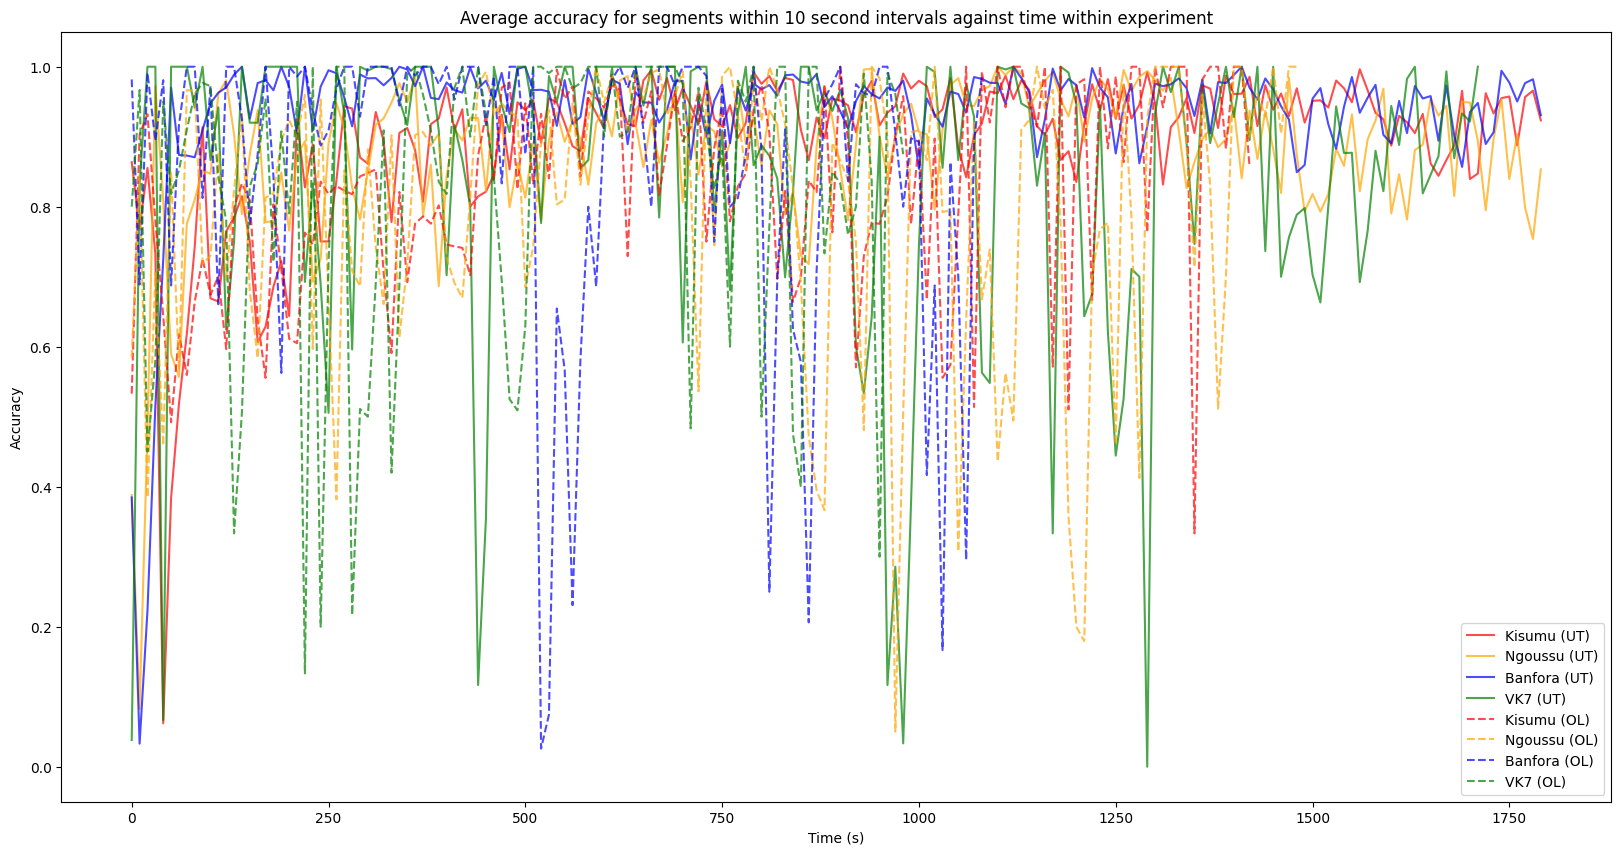

In [10]:
plt.figure(figsize=(20,10))

dff_kisumu_ut = combine(df_kisumu_ut, 10)
dff_ngoussu_ut = combine(df_ngoussu_ut, 10)
dff_banfora_ut = combine(df_banfora_ut, 10)
dff_vk7_ut = combine(df_vk7_ut, 10)
plt.plot(np.arange(0, 10*(dff_kisumu_ut), 10),dff_kisumu_ut['accuracy'], 'red', label='Kisumu (UT)', alpha=0.7)
plt.plot(np.arange(0, 10*len(dff_ngoussu_ut), 10),dff_ngoussu_ut['accuracy'], 'orange', label='Ngoussu (UT)', alpha=0.7)
plt.plot(np.arange(0, 10*len(dff_banfora_ut), 10),dff_banfora_ut['accuracy'], 'blue', label='Banfora (UT)', alpha=0.7)
plt.plot(np.arange(0, 10*len(dff_vk7_ut), 10),dff_vk7_ut['accuracy'], 'green', label='VK7 (UT)', alpha=0.7)

dff_kisumu_ol = combine(df_kisumu_ol, 10)
dff_ngoussu_ol = combine(df_ngoussu_ol, 10)
dff_banfora_ol = combine(df_banfora_ol, 10)
dff_vk7_ol = combine(df_vk7_ol, 10)
plt.plot(np.arange(0, 10*len(dff_kisumu_ol), 10),dff_kisumu_ol['accuracy'], 'red', linestyle='dashed', label='Kisumu (OL)', alpha=0.7)
plt.plot(np.arange(0, 10*len(dff_ngoussu_ol), 10),dff_ngoussu_ol['accuracy'], 'orange',linestyle='dashed', label='Ngoussu (OL)', alpha=0.7)
plt.plot(np.arange(0, 10*len(dff_banfora_ol), 10),dff_banfora_ol['accuracy'], 'blue',linestyle='dashed', label='Banfora (OL)', alpha=0.7)
plt.plot(np.arange(0, 10*len(dff_vk7_ol), 10),dff_vk7_ol['accuracy'], 'green',linestyle='dashed', label='VK7 (OL)', alpha=0.7)

plt.xlabel('Time (s)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Average accuracy for segments within 10 second intervals against time within experiment')
plt.show()


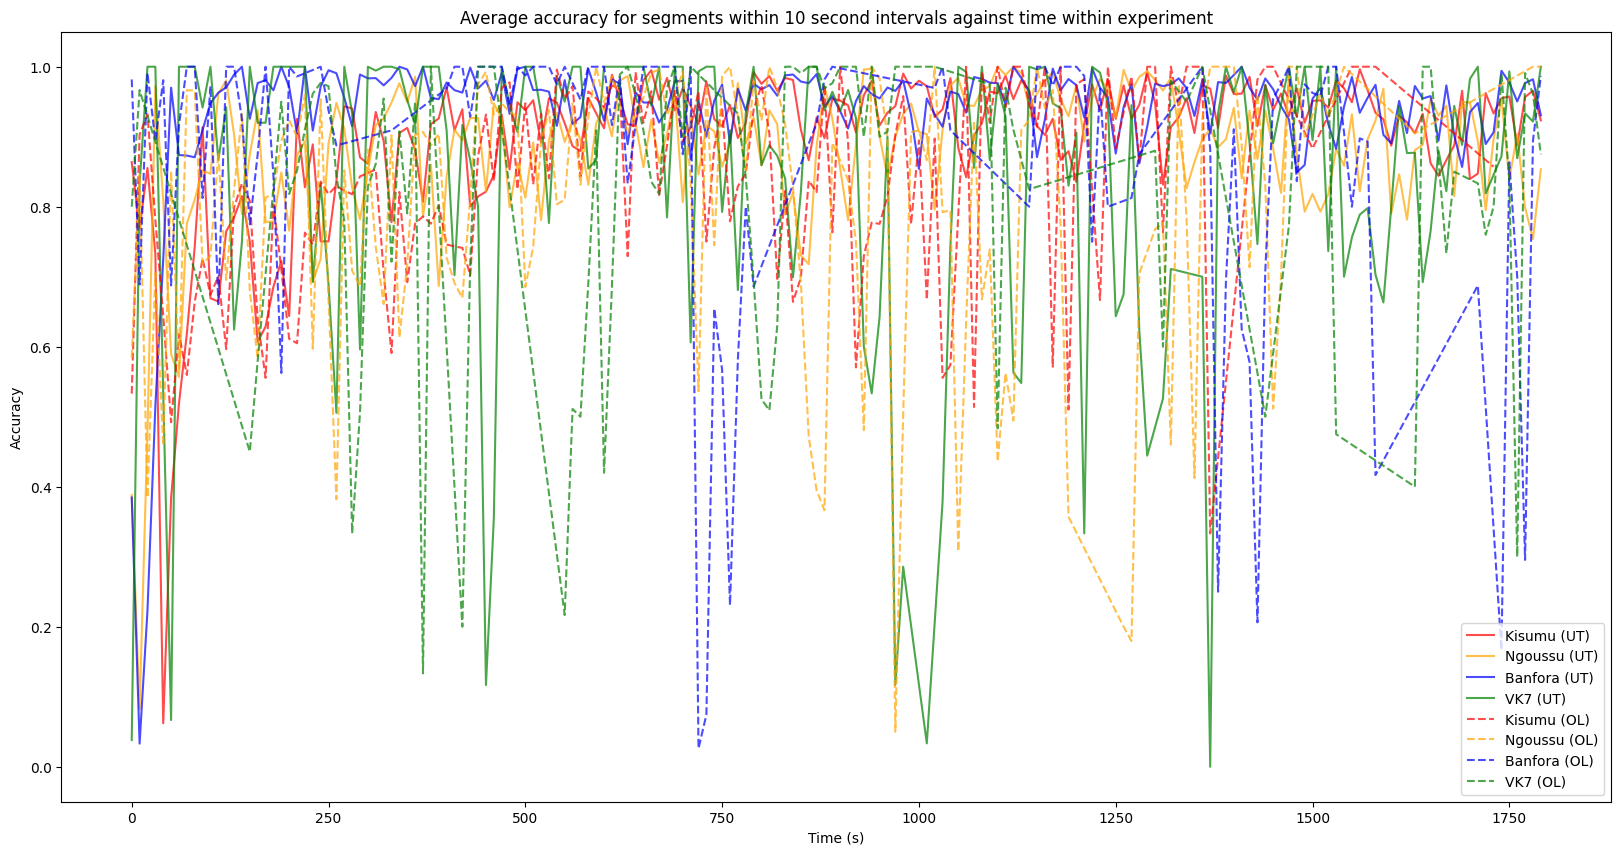

In [29]:
plt.figure(figsize=(20,10))

dff_kisumu_ut = combine(df_kisumu_ut, 10)
dff_ngoussu_ut = combine(df_ngoussu_ut, 10)
dff_banfora_ut = combine(df_banfora_ut, 10)
dff_vk7_ut = combine(df_vk7_ut, 10)
plt.plot(10*dff_kisumu_ut.index.values ,dff_kisumu_ut['accuracy'],'red', label='Kisumu (UT)', alpha=0.7)
plt.plot(10*dff_ngoussu_ut.index.values ,dff_ngoussu_ut['accuracy'],'orange', label='Ngoussu (UT)', alpha=0.7)
plt.plot(10*dff_banfora_ut.index.values ,dff_banfora_ut['accuracy'],'blue', label='Banfora (UT)', alpha=0.7)
plt.plot(10*dff_vk7_ut.index.values ,dff_vk7_ut['accuracy'],'green', label='VK7 (UT)', alpha=0.7)

dff_kisumu_ol = combine(df_kisumu_ol, 10)
dff_ngoussu_ol = combine(df_ngoussu_ol, 10)
dff_banfora_ol = combine(df_banfora_ol, 10)
dff_vk7_ol = combine(df_vk7_ol, 10)
plt.plot(10*dff_kisumu_ol.index.values ,dff_kisumu_ol['accuracy'],'red', linestyle='dashed', label='Kisumu (OL)', alpha=0.7)
plt.plot(10*dff_ngoussu_ol.index.values ,dff_ngoussu_ol['accuracy'],'orange',linestyle='dashed', label='Ngoussu (OL)', alpha=0.7)
plt.plot(10*dff_banfora_ol.index.values ,dff_banfora_ol['accuracy'],'blue',linestyle='dashed', label='Banfora (OL)', alpha=0.7)
plt.plot(10*dff_vk7_ol.index.values ,dff_vk7_ol['accuracy'],'green',linestyle='dashed',  label='VK7 (OL)', alpha=0.7)

plt.xlabel('Time (s)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Average accuracy for segments within 10 second intervals against time within experiment')
plt.show()


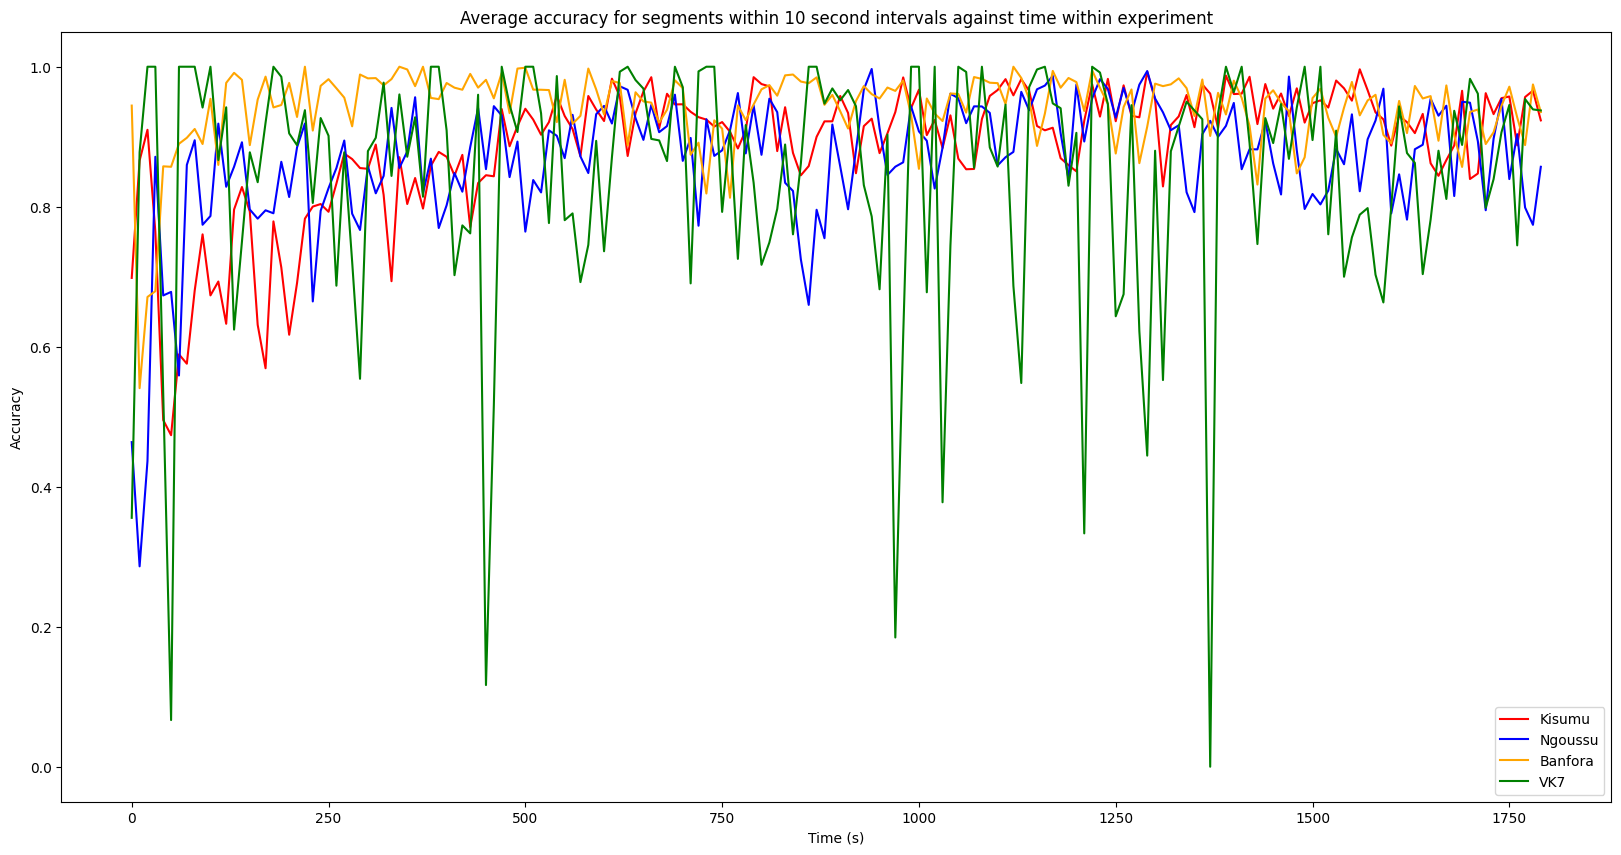

In [30]:
plt.figure(figsize=(20,10))

dff_kisumu = combine(df_kisumu, 10)
dff_ngoussu = combine(df_ngoussu, 10)
dff_banfora = combine(df_banfora, 10)
dff_vk7 = combine(df_vk7, 10)
plt.plot(10*dff_kisumu.index.values,dff_kisumu['accuracy'], 'red', label='Kisumu')
plt.plot(10*dff_ngoussu.index.values,dff_ngoussu['accuracy'], 'blue', label='Ngoussu')
plt.plot(10*dff_banfora.index.values,dff_banfora['accuracy'], 'orange', label='Banfora')
plt.plot(10*dff_vk7.index.values,dff_vk7['accuracy'], 'green', label='VK7')

plt.xlabel('Time (s)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Average accuracy for segments within 10 second intervals against time within experiment')
plt.show()


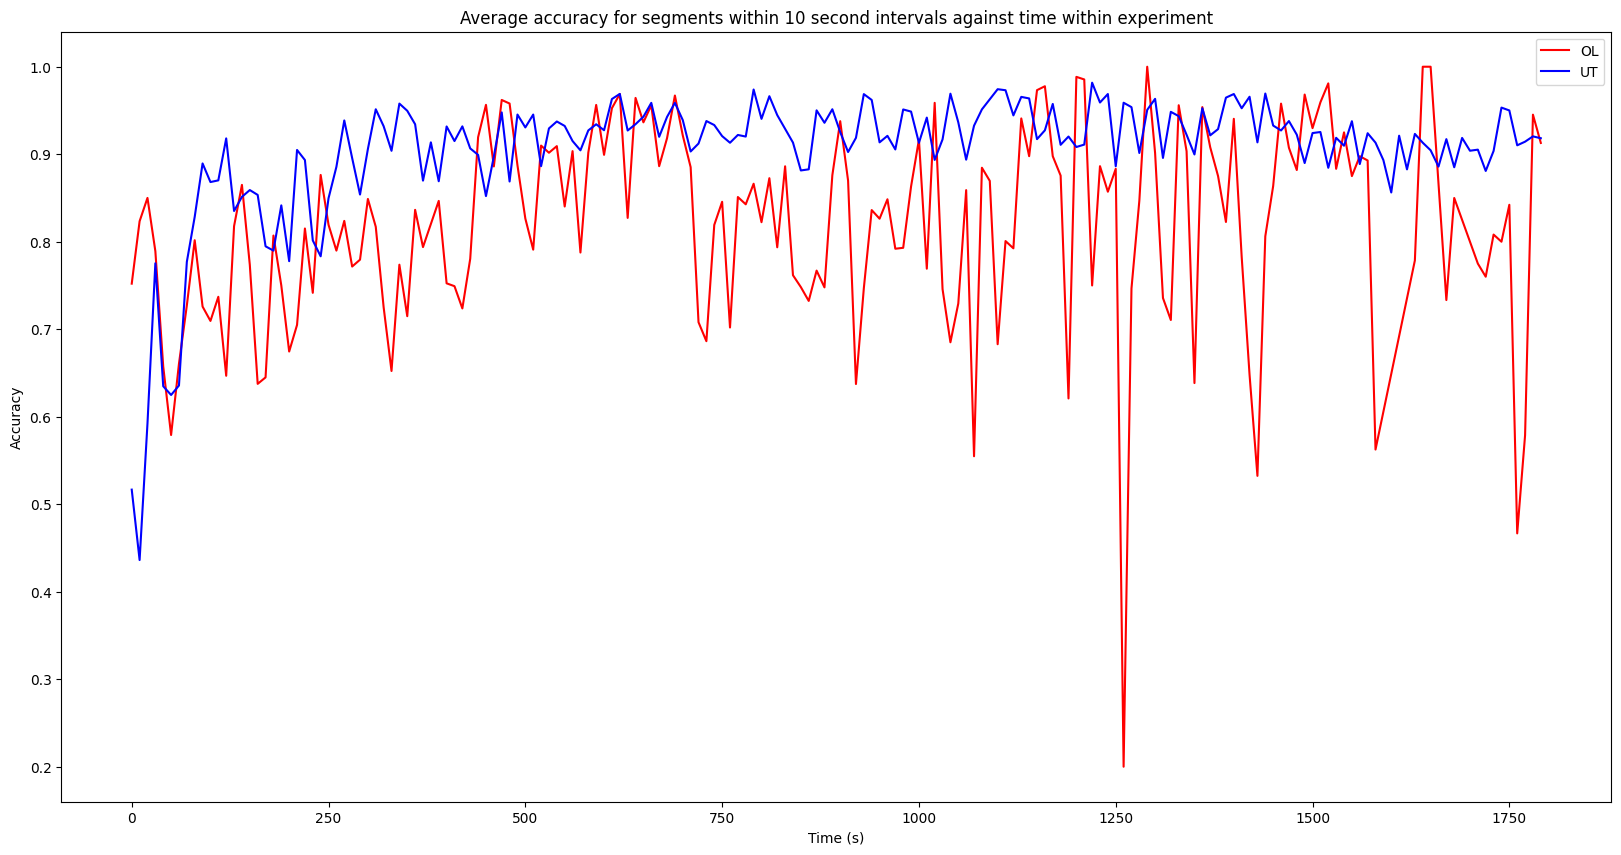

In [31]:
plt.figure(figsize=(20,10))

dff_ir = combine(df_ir, 10)
dff_is = combine(df_is, 10)
plt.plot(10*dff_ir.index.values,dff_ir['accuracy'], 'r', label='OL')
plt.plot(10*dff_is.index.values,dff_is['accuracy'], 'b', label='UT')

plt.xlabel('Time (s)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Average accuracy for segments within 10 second intervals against time within experiment')
plt.show()


In [ ]:
len(dff_is)

C:\Users\u1839729\AppData\Local\Temp\ipykernel_8784\363660586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['timestamp_group'] = (dataframe['timestamp'] // (10))
C:\Users\u1839729\AppData\Local\Temp\ipykernel_8784\363660586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['timestamp_group'] = (dataframe['timestamp'] // (10))
C:\Users\u1839729\AppData\Local\Temp\ipykernel_8784\363660586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

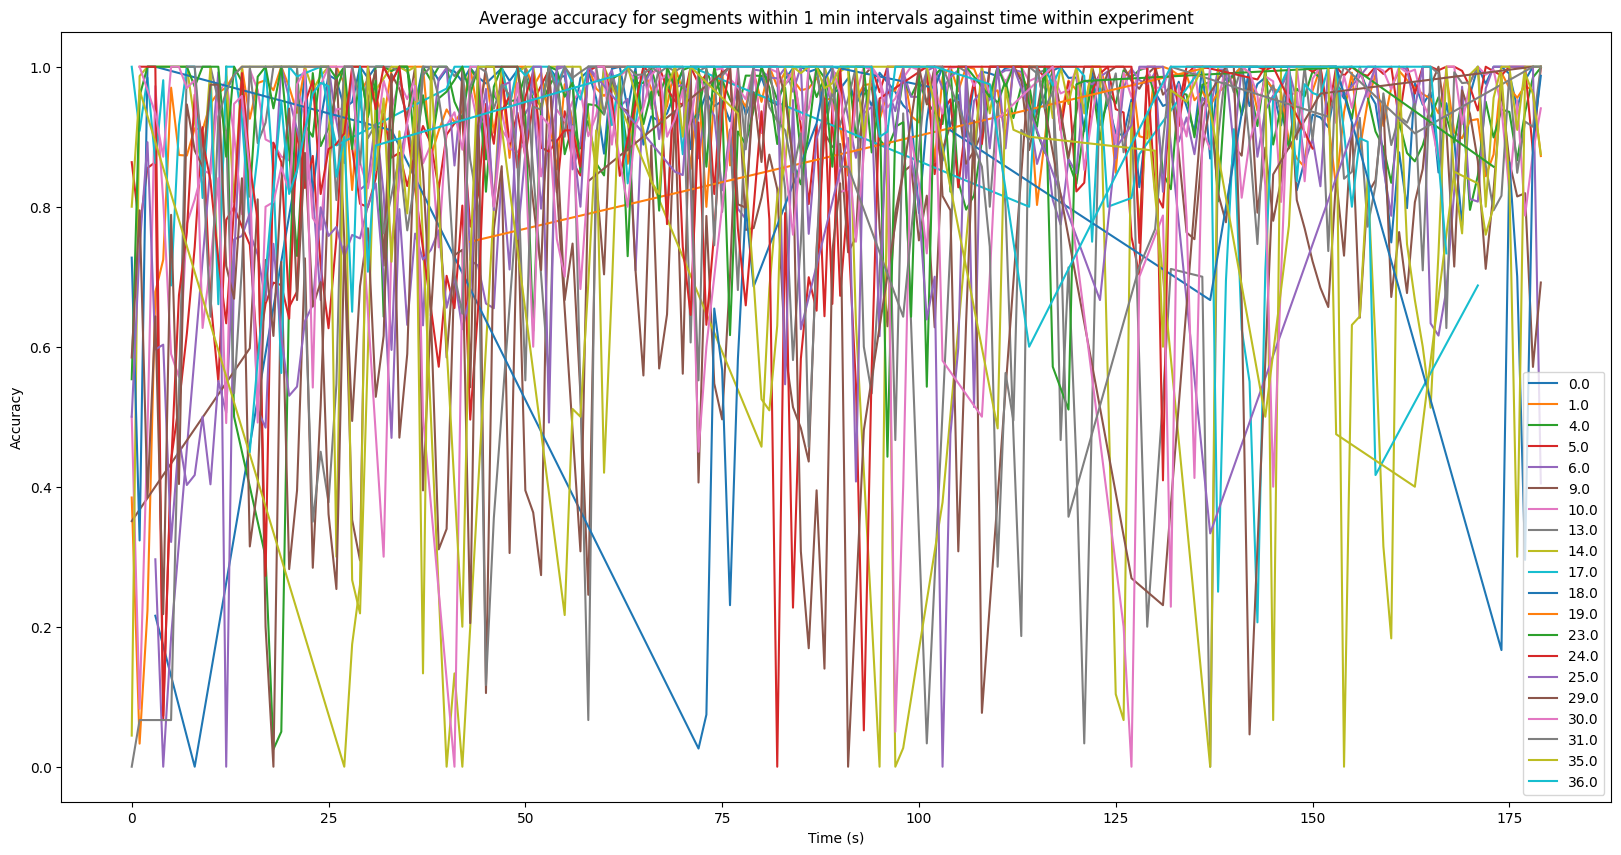

In [11]:
plt.figure(figsize=(20,10))
for trial in sorted(df_all['trial_id'].unique()):
    new_df = combine(df_all[df_all['trial_id'] == trial], 10)
    new_df.sort_index()
    plt.plot(new_df.index ,new_df['accuracy'])


plt.xlabel('Time (s)')
plt.ylabel('Accuracy')
plt.legend(sorted(df_all['trial_id'].unique()))
plt.title('Average accuracy for segments within 1 min intervals against time within experiment')
plt.show()


In [ ]:
dff_is.sort_index()
dff_ir.sort_index()

plt.figure(figsize=(20,10))
plt.plot(dff_ir.index['timestamp_group'] ,dff_ir['accuracy'], 'r')
plt.plot(dff_is.index['timestamp_group'] ,dff_is['accuracy'], 'b')
plt.xlabel('Time (s)')
plt.ylabel('Accuracy')
plt.legend(['IR', 'IS'])
plt.title('Average accuracy for segments within 1 min intervals against time within experiment')
plt.show()

In [ ]:
dff_ir = combine(df_ir, 60)
dff_is = combine(df_is, 60)

In [ ]:
dff_ir

In [ ]:
dff_ir.index

In [ ]:
dff_is.sort_index()
dff_ir.sort_index()

plt.figure(figsize=(20,10))
plt.plot(dff_ir.index['timestamp_group'] ,dff_ir['accuracy'], 'r')
plt.plot(dff_is.index['timestamp_group'] ,dff_is['accuracy'], 'b')
plt.xlabel('Time (s)')
plt.ylabel('Accuracy')
plt.legend(['IR', 'IS'])
plt.title('Average accuracy for segments within 1 min intervals against time within experiment')
plt.show()

In [13]:
np.unique(trial_id)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39.])

In [21]:
max_time = 0
for s in segments[np.isin(trial_id, [35,36,37,38,39])]:
    times = np.max(s[:, 16])
    if times > max_time:
        max_time = times

In [18]:
segments[np.isin(trial_id, [35,36,37,38,39])][0].shape

(302, 23)

In [22]:
max_time

1799.64

#### Boxplots of features across trial

In [ ]:

import sys 

sys.path.append('H:/Documents/PhD/itns/olyset-vs-untreated/src/')
import split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'E:/ITNS/olyset-vs-untreated/tests/first-run/data/'

tracks = np.load(path+'raw_tracks.npy', allow_pickle=True)
targets = np.load(path+'raw_trackTargets.npy', allow_pickle=True)
trial_id = np.load(path+'raw_tracksTrialId.npy', allow_pickle=True)

In [ ]:
def reshape(track_id, arr):
    new_arr = []
    for row in range(len(arr[0])):
        new_arr.append([track_id, arr[0][row], arr[1][row], arr[2][row]])
    return new_arr

def feature_distribution(tracks, feature_index_1, feature_index_2):
    data = []
    for track_id, track in enumerate(tracks):
        data += reshape(track_id, [track[:, 16], track[:, feature_index_1], track[:, feature_index_2]])
    return data

In [ ]:
data = feature_distribution(tracks, 2, 6)
data

In [ ]:
data = pd.DataFrame(data=data, columns=['track_id', 'frame no', 'timestamp', 'cum length'])

targets_segments = []
for i in range(len(tracks)):
    for j in range(len(tracks[i])):
        targets_segments.append(trial_id[i])

data['target'] = targets_segments
data['frame no'] = data['frame no']//50

In [ ]:
data = data.dropna()

In [ ]:
data

In [ ]:
len(data['value'].unique())

In [ ]:

#def feature_array(df, time_size, filter_percent=None):
#    arr = []
#    start = 0

#    d = df['timestamp'].values
#    bottom = np.percentile(d, filter_percent)
#    top = np.percentile(d, 100-filter_percent)

#    for timestamp in range(time_size, int(max(df['timestamp'].values)+1), time_size):
#        values = df[(df['timestamp'] > start) & (df['timestamp'] < timestamp)]['value'].values
#        values = values[values < top]
#        values = values[values > bottom]
#        arr.append(values)
#        start += time_size
#    return arr


def feature_array(df, time_size, filter_percent=None):
    arr = []
    start = 0

    d = df['frame no'].values
    bottom = np.percentile(d, filter_percent)
    top = np.percentile(d, 100-filter_percent)

    for timestamp in range(time_size, int(max(df['frame no'].values)+1), time_size):
        values = df[(df['frame no'] > start) & (df['frame no'] < timestamp)]
        
        tk_vals = []
        for s in values['track_id'].unique():
            min_val = values[values['track_id'] == s]['cum length'].min()
            max_val = values[values['track_id'] == s]['cum length'].max()
            tk_vals.append(max_val-min_val)
        arr.append(np.array(tk_vals))
        start += time_size
    return arr

arr_banfora = feature_array(data[data['target'].isin([0,1,2,3])], 5*60, 0)
arr_kisumu = feature_array(data[data['target'].isin([4,5,6,7,8])], 5*60, 0)
arr_ngoussu = feature_array(data[data['target'].isin([9,10,11,12])], 5*60, 0)
arr_vk7 = feature_array(data[data['target'].isin([13,14,15,16])], 5*60, 0)

In [ ]:
title_ = 'displacement'
ylabel_ = 'distances (mm)'

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title(f'Banfora (UT) - Distribution of {title_} over 5 min segments')
plt.boxplot(arr_banfora)
plt.xticks([i for i in range(0, 24)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'Kisumu (UT) - Distribution of {title_} over 5 min segments')
plt.boxplot(arr_kisumu)
plt.xticks([i for i in range(0, 24)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'Ngoussu (UT) - Distribution of {title_} over 5 min segments')
plt.boxplot(arr_ngoussu)
plt.xticks([i for i in range(0, 24)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'VK7 (UT) - Distribution of {title_} over 5 min segments')
plt.boxplot(arr_vk7)
plt.xticks([i for i in range(0, 24)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

In [ ]:
arr_banfora_ol = feature_array(data[data['target'].isin([17,18,19,20,21,22])], 5*60, 0)
arr_kisumu_ol = feature_array(data[data['target'].isin([23,24,25,26,27,28])], 5*60, 0)
arr_ngoussu_ol = feature_array(data[data['target'].isin([29,30,31,32,33,34])], 5*60, 0)
arr_vk7_ol = feature_array(data[data['target'].isin([35,36,37,38,39])], 5*60, 0)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title(f'Banfora (OL) - Distribution of {title_} over 5 min segments')
plt.boxplot(arr_banfora_ol)
plt.xticks([i for i in range(0, 24)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'Kisumu (OL) - Distribution of {title_} over 5 min segments')
plt.boxplot(arr_kisumu_ol)
plt.xticks([i for i in range(0, 24)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'Ngoussu (OL) - Distribution of {title_} over 5 min segments')
plt.boxplot(arr_ngoussu_ol)
plt.xticks([i for i in range(0, 24)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'VK7 (OL) - Distribution of {title_} over 5 min segments')
plt.boxplot(arr_vk7_ol)
plt.xticks([i for i in range(0, 24)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

In [ ]:
title_ = 'velocities'
ylabel_ = 'Velocity (mm/s)'

title_ = 'num of tracks'
ylabel_ = 'num of tracks'

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title(f'Banfora (UT) - Distribution of {title_} over 5 min segments')
plt.plot(arr_banfora)
plt.xticks([i for i in range(0, 24)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'Kisumu (UT) - Distribution of {title_} over 5 min segments')
plt.plot(arr_kisumu)
plt.xticks([i for i in range(0, 24)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'Ngoussu (UT) - Distribution of {title_} over 5 min segments')
plt.plot(arr_ngoussu)
plt.xticks([i for i in range(0, 24)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'VK7 (UT) - Distribution of {title_} over 5 min segments')
plt.plot(arr_vk7)
plt.xticks([i for i in range(0, 24)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title(f'Banfora (UT) - Distribution of {title_} over 5 min segments')
plt.boxplot(arr_banfora)
plt.xticks([i for i in range(1, 25)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'Kisumu (UT) - Distribution of {title_} over 5 min segments')
plt.boxplot(arr_kisumu)
plt.xticks([i for i in range(1, 25)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'Ngoussu (UT) - Distribution of {title_} over 5 min segments')
plt.boxplot(arr_ngoussu)
plt.xticks([i for i in range(1, 25)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'VK7 (UT) - Distribution of {title_} over 5 min segments')
plt.boxplot(arr_vk7)
plt.xticks([i for i in range(1, 25)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

In [ ]:
arr_banfora_ol = feature_array(data[data['target'].isin([17,18,19,20,21,22])], 5*60, 0)
arr_kisumu_ol = feature_array(data[data['target'].isin([23,24,25,26,27,28])], 5*60, 0)
arr_ngoussu_ol = feature_array(data[data['target'].isin([29,30,31,32,33,34])], 5*60, 0)
arr_vk7_ol = feature_array(data[data['target'].isin([35,36,37,38,39])], 5*60, 0)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title(f'Banfora (OL) - Distribution of {title_} over 5 min segments')
plt.plot(arr_banfora_ol)
plt.xticks([i for i in range(0, 24)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'Kisumu (OL) - Distribution of {title_} over 5 min segments')
plt.plot(arr_kisumu_ol)
plt.xticks([i for i in range(0, 24)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'Ngoussu (OL) - Distribution of {title_} over 5 min segments')
plt.plot(arr_ngoussu_ol)
plt.xticks([i for i in range(0, 24)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'VK7 (OL) - Distribution of {title_} over 5 min segments')
plt.plot(arr_vk7_ol)
plt.xticks([i for i in range(0, 24)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title(f'Banfora (OL) - Distribution of {title_} over 5 min segments')
plt.boxplot(arr_banfora_ol)
plt.xticks([i for i in range(1, 25)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'Kisumu (OL) - Distribution of {title_} over 5 min segments')
plt.boxplot(arr_kisumu_ol)
plt.xticks([i for i in range(1, 25)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'Ngoussu (OL) - Distribution of {title_} over 5 min segments')
plt.boxplot(arr_ngoussu_ol)
plt.xticks([i for i in range(1, 25)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

plt.figure(figsize=(15,10))
plt.title(f'VK7 (OL) - Distribution of {title_} over 5 min segments')
plt.boxplot(arr_vk7_ol)
plt.xticks([i for i in range(1, 25)], [i*5 for i in range(1, 25)])
plt.xlabel('Time (mins)')
plt.ylabel(ylabel_)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('IR - Distribution of velocities over 5 min segments')
plt.boxplot(arr_ir)
plt.xticks([i for i in range(1, 25)], [i*5 for i in range(1, 25)])
plt.show()

plt.figure(figsize=(15,10))
plt.title('IS - Distribution of velocities over 5 min segments')
plt.boxplot(arr_is)
plt.xticks([i for i in range(1, 23)], [i*5 for i in range(1, 25)])
plt.show()

In [ ]:
# track durations
def feature_array(df, time_size):
    arr = []
    start = 0

    d = df['timestamp'].values
    for timestamp in range(time_size, int(max(df['timestamp'].values)+1), time_size):
        values = df[(df['timestamp'] > start) & (df['timestamp'] < timestamp)]['timestamp']
        arr.append(len(values.unique()))
        start += time_size
    return arr

arr_banfora = feature_array(data[data['target'].isin([0,1,2,3])], 5*60)
arr_kisumu = feature_array(data[data['target'].isin([4,5,6,7,8])], 5*60)
arr_ngoussu = feature_array(data[data['target'].isin([9,10,11,12])], 5*60)
arr_vk7 = feature_array(data[data['target'].isin([13,14,15,16])], 5*60)

#### After Splitting Distances and velocities

In [ ]:
'''LOAD TRACKS STORED AS NUMPY ARRAY'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'E:/IR_VS_IS/data/tracks.npy'
tracks = np.load(path, allow_pickle=True)
targets = np.load('E:/IR_VS_IS/data/trackTargets.npy', allow_pickle=True)
trial_id = np.load('E:/IR_VS_IS/data/tracksTrialId.npy', allow_pickle=True)

df = pd.read_pickle('E:/IR_VS_IS/results/preprocess/df.pkl')

In [ ]:
'''DURATIONS AND DISTANCES AND VELOCITIES'''

def get_length(tracks):
    x = tracks[1:,0] - tracks[:-1,0]
    y = tracks[1:,1] - tracks[:-1,1]
    _sum = np.power(x, 2) + np.power(y, 2)
    return np.sqrt(_sum.astype(float)).sum()
    
durations = []
distances = []
velocities = []
for trial in np.unique(trial_id):
    durations.append([])
    distances.append([])
    velocities.append([])

for trial_index, trial in enumerate(np.unique(trial_id)):
    for index, track in enumerate(tracks):
        if trial_id[index] == trial:
            duration = track[-1, 2] - track[0, 2]
            durations[trial_index].append(duration)
            distances[trial_index].append(get_length(track))
            velocities[trial_index].append(get_length(track)/duration)

In [ ]:
pos_velocities = []
for trial in np.unique(trial_id):
    pos_velocities.append([])

for trial_index, trial in enumerate(np.unique(trial_id)):
    for index, track in enumerate(tracks):
        if trial_id[index] == trial:
            x = track[:, 3]
            x = x[~np.isnan(x)]
            pos_velocities[trial_index] += x.tolist()

In [ ]:
d = []
for i in durations:
    d += i

print(sum(d)/len(d))
print(np.std(d))

In [ ]:
'''BOXPLOT OF DURATIONS'''

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(durations)
plt.xticks([i+1 for i in range(len(trial_names))],trial_names, rotation=90)
plt.ylabel('Track Duration (seconds)')
plt.xlabel('Trial ID')
plt.title('Boxplot of distribution of durations within each trial')
plt.show()

In [ ]:
'''BOXPLOT OF DISTANCES'''

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(distances)
plt.xticks([i+1 for i in range(len(trial_names))],trial_names, rotation=90)
plt.ylabel('Track Distances (mm)')
plt.xlabel('Trial ID')
plt.title('Boxplot of distances within each trial')
plt.show()

In [ ]:
'''BOXPLOT OF POSITIONAL VELOCITIES'''

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(pos_velocities)
plt.xticks([i+1 for i in range(len(trial_names))],trial_names, rotation=90)
plt.ylabel('Track velocity (mms^-1)')
plt.xlabel('Trial ID')
plt.title('Boxplot of distribution of velocities within each trial')
plt.show()

#### Differences between Models

In [ ]:
import pandas as pd

In [ ]:
path = 'E:/IR_VS_IS/tuned model/'
df_raw = pd.read_pickle(path + f'xgboost-mutual/data/df_target_raw.pkl')

In [ ]:
df_raw

In [ ]:
models = ['xgboost', 'random-forests', 'logistic-regression']
filtering = ['mutual', 'gradient']
path = 'E:/IR_VS_IS/tuned model/'
for model in models:
    for filter in filtering:
        df_raw = pd.read_pickle(path + f'{model}-{filter}/data/df_target_raw.pkl')
        df_filtered = pd.read_pickle(path + f'{model}-{filter}/data/df_target_filtered.pkl')
        print(f' ---- {model} {filter} ----')
        print('RAW SEGMENTS NUM: ', len(df_raw))
        print('RAW TRACK NUM: ', len(df_raw['TrackGroup'].unique()))
        print('FILTERED SEGMENTS NUM: ', len(df_filtered))
        print('FILTERED TRACK NUM: ', len(df_filtered['TrackGroup'].unique()))
        print('CHANGE SEGMENTS NUM: ', len(df_filtered)/len(df_raw))
        print('CHANGE TRACK NUM: ', len(df_filtered['TrackGroup'].unique())/len(df_raw['TrackGroup'].unique()))
        print('')


In [ ]:
import openpyxl

In [ ]:
wb = openpyxl.Workbook()
sheet = wb.create_sheet()

models = ['xgboost', 'random-forests', 'logistic-regression']
filtering = ['mutual', 'gradient']
path = 'E:/IR_VS_IS/tuned model/'
row_headings = ['', 'RAW SEGMENT NUM', 'RAW TRACK NUM', 'FILTERED SEGMENT NUM',
                'FILTERED TRACK NUM', '% SEGMENTS KEPT', '% TRACKS KEPT']
for i, value in enumerate(row_headings):
    sheet.cell(row=i+1, column=1).value = value

column = 2
for model in models:
    for filter in filtering:
        df_raw = pd.read_pickle(path + f'{model}-{filter}/data/df_target_raw.pkl')
        df_filtered = pd.read_pickle(path + f'{model}-{filter}/data/df_target_filtered.pkl')

        sheet.cell(row=1, column=column).value = f'{model} {filter}'
        sheet.cell(row=2, column=column).value = len(df_raw)
        sheet.cell(row=3, column=column).value = len(df_raw['TrackGroup'].unique())
        sheet.cell(row=4, column=column).value = len(df_filtered)
        sheet.cell(row=5, column=column).value =  len(df_filtered['TrackGroup'].unique())
        sheet.cell(row=6, column=column).value = len(df_filtered)/len(df_raw)
        sheet.cell(row=7, column=column).value =  len(df_filtered['TrackGroup'].unique())/len(df_raw['TrackGroup'].unique())

        column += 1

wb.save("filtering-data.xlsx")

#### Testing example tracks

In [ ]:
# HEATMAPS
import joblib
import pandas as pd
import os
import matplotlib.pyplot as plt

dir_path = 'E:/IR_VS_IS/tuned model/idealised-tracks/02-03-2024-neg-vel/'
paths = os.listdir(dir_path)

save_path = 'E:/IR_VS_IS/tuned model/idealised-tracks/02-03-2024-neg-vel/imgs/'

for path in paths:
    if '.dat' in path:
        data = joblib.load(dir_path+path)

        wave_type = path.split('_')[1].split('.')[0]

        results = []
        for i in range(len(data['tasks'])):
            results.append({
                'amplitude': data['tasks'][i][0],
                'frequency': data['tasks'][i][1],
                'profile': data['tasks'][i][2],
                'vx':  data['tasks'][i][4],
                'xgboost': data['data'][i][2][0],
            })

        df = pd.DataFrame(results)

        for vx in [-150, -300, -450, -600]:
            result = df[df['vx'] == vx]

            x_values = result['amplitude']
            y_values = result['frequency'] 
            color_values = result['xgboost']

            plt.figure(figsize=(20,12))
            plt.scatter(
                x_values, y_values, c=color_values, s=40, cmap='bwr'
            )
            plt.xlabel('Amplitude (mm)')
            plt.ylabel('Frequency (Hz)')
            plt.title(f'XGBoost -- wave type: {wave_type} -- vx: {vx} $mm s^{-1}$')

            cbar = plt.colorbar(label='Prediction probability score (1 = IR, 0 = IS)')

            plt.grid()
            plt.savefig(save_path+f'{wave_type}-{vx}.png', bbox_inches='tight')
            plt.close()



In [ ]:
# 3D IMGS
import joblib
import pandas as pd
import os
import matplotlib.pyplot as plt

dir_path = 'E:/IR_VS_IS/tuned model/idealised-tracks/29-02-2024/'
paths = os.listdir(dir_path)

save_path = 'E:/IR_VS_IS/tuned model/idealised-tracks/29-02-2024/imgs-3d/'

for path in paths:
    if '.dat' in path:
        data = joblib.load(dir_path+path)

        wave_type = path.split('_')[1].split('.')[0]

        results = []
        for i in range(len(data['tasks'])):
            results.append({
                'amplitude': data['tasks'][i][0],
                'frequency': data['tasks'][i][1],
                'profile': data['tasks'][i][2],
                'vx':  data['tasks'][i][4],
                'xgboost': data['data'][i][2][0],
            })

        df = pd.DataFrame(results)

        for vx in [150, 300, 450, 600]:
            result = df[df['vx'] == vx]
            result = result[result['frequency'] <= 25]

            x = result['amplitude']
            y = result['frequency'] 
            z = result['xgboost']

            fig = plt.figure(figsize=(20, 10))

            ax1 = fig.add_subplot(121, projection='3d')
            ax1.plot_trisurf(y, x, z, cmap='bwr', edgecolor='none', alpha=0.7, shade=False)
            ax1.set_xlabel('frequency')
            ax1.set_ylabel('amplitude')
            ax1.set_zlabel('prob score (1 = IR, 0 = IS)')
            ax1.dist = 11

            ax2 = fig.add_subplot(122, projection='3d')
            ax2.plot_trisurf(y, x, (1-z), cmap='bwr', edgecolor='none', alpha=0.7, shade=False)
            ax2.set_xlabel('frequency')
            ax2.set_ylabel('amplitude')
            ax2.set_zlabel('prob score (0 = IR, 1 = IS)')
            ax2.dist = 11

            plt.title(f'XGBoost -- wave type: {wave_type} -- vx: {vx} $mm s^{-1}$')
            plt.savefig(save_path+f'3d-{wave_type}-{vx}.png', bbox_inches='tight')
            plt.close()



In [ ]:
import joblib
import pandas as pd

path = 'E:/IR_VS_IS/tuned model/idealised-tracks/29-02-2024/'
data = joblib.load(path+'data_sinusodial1.dat')

results = []
for i in range(len(data['tasks'])):
    results.append({
        'amplitude': data['tasks'][i][0],
        'frequency': data['tasks'][i][1],
        'profile': data['tasks'][i][2],
        'vx':  data['tasks'][i][4],
        'xgboost': data['data'][i][2][0],
    })

df = pd.DataFrame(results)

In [ ]:
df_v = df[(df['vx'] == 450) & (df['frequency'] <= 25)]
df_v = df_v.drop(columns=['profile', 'vx'])
df_v

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


x = df_v['amplitude'].values
y = df_v['frequency'].values
z = df_v['xgboost'].values

scaler = StandardScaler()
df_v_scaled = scaler.fit_transform(df_v) 

clf = KMeans(n_clusters=2)
#clf = DBSCAN(eps=0.5)

labels = clf.fit_predict(df_v_scaled)

fig = plt.figure(figsize=(22, 20))

ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(y, x, z, c=labels)
ax1.set_xlabel('frequency')
ax1.set_ylabel('amplitude')
ax1.set_zlabel('prob score (1 = IR, 0 = IS)')
ax1.dist = 11

ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(y, x, (1-z), c=labels)
ax2.set_xlabel('frequency')
ax2.set_ylabel('amplitude')
ax2.set_zlabel('prob score (0 = IR, 1 = IS)')
ax2.dist = 11

ax3 = fig.add_subplot(223, projection='3d')
ax3.plot_trisurf(y, x, z, edgecolor='none', cmap='bwr', alpha=0.6, shade=False)
ax3.set_xlabel('frequency')
ax3.set_ylabel('amplitude')
ax3.set_zlabel('prob score (1 = IR, 0 = IS)')
ax3.dist = 11

ax4 = fig.add_subplot(224, projection='3d')
ax4.plot_trisurf(y, x, (1-z), edgecolor='none', cmap='bwr', alpha=0.6, shade=False)
ax4.set_xlabel('frequency')
ax4.set_ylabel('amplitude')
ax4.set_zlabel('prob score (0 = IR, 1 = IS)')
ax4.dist = 11

#plt.title(f'XGBoost -- wave type: {wave_type} -- vx: {vx} $mm s^{-1}$')
#plt.savefig(save_path+f'3d-{wave_type}-{vx}.png', bbox_inches='tight')
#plt.close()
plt.show()

In [ ]:
scaler.inverse_transform(clf.cluster_centers_)

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [ ]:
vx = 150
wave_type = 'triangular' #'$sinusodial^{4}$'

results = []
for i in range(len(data['tasks'])):
    results.append({
        'amplitude': data['tasks'][i][0],
        'frequency': data['tasks'][i][1],
        'profile': data['tasks'][i][2],
        'vx':  data['tasks'][i][4],
        'xgboost': data['data'][i][2][0],
    })

df = pd.DataFrame(results)
df = df[df['vx'] == vx]

result = df
x_values = result['amplitude']
y_values = result['frequency'] #period']
color_values = result['xgboost']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator


x = x_values
y = y_values
z = color_values

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_trisurf(y, x, z, cmap='bwr', edgecolor='none', alpha=0.7, shade=False)
ax1.set_xlabel('frequency')
ax1.set_ylabel('amplitude')
ax1.set_zlabel('prob score (1 = IR, 0 = IS)')
ax1.dist = 11

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(y, x, (1-z), cmap='bwr', edgecolor='none', alpha=0.7, shade=False)
ax2.set_xlabel('frequency')
ax2.set_ylabel('amplitude')
ax2.set_zlabel('prob score (0 = IR, 1 = IS)')
ax2.dist = 11

plt.show()

In [ ]:
vx = [150, 200, 250, 300, 450, 600]

In [ ]:
vx = -150
wave_type = 'triangular' #'$sinusodial^{4}$'

results = []
for i in range(len(data['tasks'])):
    results.append({
        'amplitude': data['tasks'][i][0],
        'frequency': data['tasks'][i][1],
        'profile': data['tasks'][i][2],
        'vx':  data['tasks'][i][4],
        'xgboost': data['data'][i][2][0],
    })

df = pd.DataFrame(results)
df = df[df['vx'] == vx]

result = df
x_values = result['amplitude']
y_values = result['frequency'] #period']
color_values = result['xgboost']

plt.figure(figsize=(20,12))
plt.scatter(
    x_values, y_values, c=color_values, s=40, cmap='bwr'
)
#plt.xlim((0, 20))
plt.xlabel('Amplitude (mm)')
plt.ylabel('Frequency (Hz)')
plt.title(f'XGBoost -- wave type: {wave_type} -- vx: {vx} $mm s^{-1}$')

cbar = plt.colorbar(label='Prediction probability score (1 = IR, 0 = IS)')

plt.grid()
plt.show()

In [ ]:
t = np.arange(0, 1.5, 0.02)

plt.figure()

x = 200*t
y = 15 * abs(np.power(np.cos(np.pi*t/0.8), 1))
plt.plot(x, y, label='cos')

x = 200*t
y = 15 * abs(np.power(np.cos(np.pi*t/0.8), 2))
plt.plot(x, y, label='cos^2')

x = 200*t
y = 15 * abs(np.power(np.cos(np.pi*t/0.8), 3))
plt.plot(x, y, label='cos^3')

x = 200*t
y = 15 * abs(np.power(np.cos(np.pi*t/0.8), 4))
plt.plot(x, y, label='cos^4')

x = (200*0.8/(2*np.pi)) * (2*np.pi*t/0.8 + np.pi - np.sin(2*np.pi*t/0.8 + np.pi)) - 200*0.8/2
y = 15/2 * (1 - np.cos(2*np.pi*t/0.8 + np.pi))
plt.plot(x, y, label='Cycloid')

x = 200*t
y = 15 * abs(2*t*(1/0.8) %2 -1)
plt.plot(x, y, label='Triangular')

x = 200*t
y = 15 * (np.floor(2*t*(1/0.8)) % 2)
plt.plot(x, y, label='Square')

plt.title('Examples of the Idealised Tracks')
plt.legend(loc='lower left')

plt.show()


#### Behavioural Modes

In [ ]:
from scipy import io
from scipy.signal import medfilt
import numpy as np

import matplotlib.pyplot as plt
import joblib

import tqdm

In [ ]:
# LOAD DATA

data_path = 'E:/IR_VS_IS/tuned model/xgboost-mutual/data/'

raw_tracks = np.load(data_path + 'raw_tracks.npy', allow_pickle=True)
raw_trial_id = np.load(data_path + 'raw_tracksTrialId.npy', allow_pickle=True)
raw_targets = np.load(data_path + 'raw_trackTargets.npy', allow_pickle=True)

bmodes = joblib.load('bmodess.dat')

In [ ]:
# LABEL DATA
track_id = 0
while track_id < len(raw_tracks):
    mask = np.isin(raw_tracks[track_id][:, 16], bmodes[track_id][:, 0])
    true_indices = np.where(mask)[0]
    result_array = np.zeros(len(mask), dtype=int)
    result_array[true_indices] = bmodes[track_id][:, 1]
    result_array = medfilt(result_array, kernel_size=5)
    raw_tracks[track_id] = np.insert(raw_tracks[track_id], len(raw_tracks[track_id][0]), result_array, axis=1)
    track_id += 1

In [ ]:
# PERCENTAGES OF BMODES

b1 = 0
b2 = 0
b3 = 0
b4 = 0

mask = np.isin(raw_trial_id, [13, 14, 15, 16])
for track in raw_tracks:
    b_mode, counts = np.unique(track[:, -1], return_counts=True)
    for b, c in zip(b_mode, counts):
        if b == 1:
            b1 += c
        elif b == 2:
            b2 += c
        elif b == 3:
            b3 += c
        elif b == 4:
            b4 += c


print(b1/(b1+b2+b3+b4))
print(b2/(b1+b2+b3+b4))
print(b3/(b1+b2+b3+b4))
print(b4/(b1+b2+b3+b4))

In [ ]:
# GET CONSECUTIVE BOUNCING MODES -> RETURNS VELS AND ACCS

def find_consecutive_true_sequences(arr, threshold):
    true_indices = np.where(arr)[0]
    diff = np.diff(true_indices)
    split_indices = np.where(diff > 1)[0]
    sequences = np.split(true_indices, split_indices + 1)
    long_sequences = [seq for seq in sequences if len(seq) > threshold]

    masks = [np.zeros_like(arr, dtype=bool) for _ in long_sequences]
    for i, seq in enumerate(long_sequences):
        masks[i][seq] = True
    
    return masks

bouncing_tracks = []
bouncing_target = []

bouncing_threshold = 50*3 # 50*3 # 5 second

for track_id, track in enumerate(raw_tracks):
    b_modes = track[:, -1]

    real_values = b_modes == 0
    real_values = ~real_values

    # bouncing mode
    mask = b_modes == 3
    masks = np.array(find_consecutive_true_sequences(mask, bouncing_threshold))
    for m in masks:        
        if real_values[m].mean() >= 0.2:
            bouncing_tracks.append(track[m][:, [0, 1, 3, 10, 12, 13, 14, 15]])
            bouncing_target.append(raw_targets[track_id])


            

In [ ]:
len(bouncing_tracks)

In [ ]:
# PLOT TRACK EXAMPLE

index = 15
plt.plot(bouncing_tracks[index][:, 0], bouncing_tracks[index][:, 1])
plt.title('Track Example')
plt.show()

In [ ]:
# PLOT COORDINATES

plt.plot(bouncing_tracks[index][:, 0], label='X coordinates')
plt.plot(bouncing_tracks[index][:, 1], label='Y coordinates')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Coordinate value')
plt.title('Coordinates')
plt.show()

In [ ]:
# vel, acc
# vel x, vel y
# acc x, acc y

In [ ]:
from scipy import signal

def plot_freq(track, nperseg):
    # velocity
    v = track[:, 2]
    v = v[~np.isnan(v)]
    f_v, p_v = signal.welch(v, fs=50, nperseg=nperseg, average='median', scaling='spectrum')
    
    # acceleration
    a = track[:, 3]
    a = a[~np.isnan(a)]
    f_a, p_a = signal.welch(a, fs=50, nperseg=nperseg, average='median', scaling='spectrum')
    
    # velocity X
    vx = track[:, 4]
    vx = vx[~np.isnan(vx)]
    f_vx, p_vx = signal.welch(vx, fs=50, nperseg=nperseg, average='median', scaling='spectrum')
    
    # velocity Y
    vy = track[:, 5]
    vy = vy[~np.isnan(vy)]
    f_vy, p_vy = signal.welch(vy, fs=50, nperseg=nperseg, average='median', scaling='spectrum')
    
    # acceleration X
    ax = track[:, 6]
    ax = ax[~np.isnan(ax)]
    f_ax, p_ax = signal.welch(ax, fs=50, nperseg=nperseg, average='median', scaling='spectrum')
    
    # acceleration Y
    ay = track[:, 7]
    ay = ay[~np.isnan(ay)]
    f_ay, p_ay = signal.welch(ay, fs=50, nperseg=nperseg, average='median', scaling='spectrum')

    fig, ax = plt.subplots(3, 2, figsize=(15, 16))
    ax[0,0].plot(f_v, p_v)
    ax[0,0].set_title('Velocity')
    ax[0,0].set_xlabel('Frequency (Hz)')
    ax[0,0].set_ylabel('Magnitude')

    ax[0,1].plot(f_a, p_a)
    ax[0,1].set_title('Acceleration')
    ax[0,1].set_xlabel('Frequency (Hz)')
    ax[0,1].set_ylabel('Magnitude')

    ax[1,0].plot(f_vx, p_vx)
    ax[1,0].set_title('Velocity X')
    ax[1,0].set_xlabel('Frequency (Hz)')
    ax[1,0].set_ylabel('Magnitude')

    ax[1,1].plot(f_vy, p_vy)
    ax[1,1].set_title('Velocity Y')
    ax[1,1].set_xlabel('Frequency (Hz)')
    ax[1,1].set_ylabel('Magnitude')

    ax[2,0].plot(f_ax, p_ax)
    ax[2,0].set_title('Acceleration X')
    ax[2,0].set_xlabel('Frequency (Hz)')
    ax[2,0].set_ylabel('Magnitude')

    ax[2,1].plot(f_ay, p_ay)
    ax[2,1].set_title('Acceleration Y')
    ax[2,1].set_xlabel('Frequency (Hz)')
    ax[2,1].set_ylabel('Magnitude')

    plt.suptitle('Magnitude vs Frequency')

    plt.show()


def plot_values(track):
    fig, ax = plt.subplots(3, 2, figsize=(10, 12))
    ax[0,0].plot(track[:, 2])
    ax[0,0].set_title('Velocity')

    ax[0,1].plot(track[:, 3])
    ax[0,1].set_title('Acceleration')

    ax[1,0].plot(track[:, 4])
    ax[1,0].set_title('Velocity X')

    ax[1,1].plot(track[:, 5])
    ax[1,1].set_title('Velocity Y')

    ax[2,0].plot(track[:, 6])
    ax[2,0].set_title('Acceleration X')

    ax[2,1].plot(track[:, 7])
    ax[2,1].set_title('Acceleration Y')

    plt.suptitle('Raw values')

    plt.show()

In [ ]:
plot_freq(bouncing_tracks[index], nperseg=150)
plot_values(bouncing_tracks[index])

In [ ]:
def get_mode(freqs, psd):
    return freqs[np.argmax(psd)]

def get_centre_of_mass(freqs, psd):
    return np.sum(freqs * psd) / np.sum(psd)

def get_fwhm(freqs, psd):
    max_magnitude = np.max(psd)
    half_max = max_magnitude / 2.0

    # Find the frequency points closest to the half-maximum magnitude
    # on both sides of the peak
    idx_left = np.where(psd >= half_max)[0][0]
    idx_right = np.where(psd >= half_max)[0][-1]

    # Get corresponding frequencies
    low_freq_half_max = freqs[idx_left]
    high_freq_half_max = freqs[idx_right]

    # Calculate FWHM
    fwhm = high_freq_half_max - low_freq_half_max
    return fwhm, low_freq_half_max, high_freq_half_max

def get_info(freqs, psd):
    print('Mode: ', get_mode(freqs, psd))
    print('Centre of mass: ', get_centre_of_mass(freqs, psd))
    fwhm, low_freq_half_max, high_freq_half_max = get_fwhm(freqs, psd)
    print('FWHM: ', fwhm)
    print('Low freq half max: ', low_freq_half_max)
    print('High freq half max: ', high_freq_half_max)
    print('')

In [ ]:
from scipy import signal

In [ ]:
def get_global_freq(tracks, index, nperseg):
    bins = np.linspace(0, 25, int(nperseg//2)+1) #np.arange(0, 25.5, 0.5)
    frequencies_arr = np.zeros(len(bins))

    for ti, track in enumerate(tracks):
        vals = track[:, index]
        vals = vals[~np.isnan(vals)]
        f, p = signal.welch(vals, fs=50, nperseg=nperseg, average='median', scaling='spectrum')
        
        for i, freq in enumerate(f):
            frequencies_arr[i] += p[i]

    frequencies_arr = frequencies_arr / len(tracks)

    return bins, frequencies_arr

nperseg = 150

# velocity
f_v, p_v = get_global_freq(bouncing_tracks, 2, nperseg)
get_info(f_v, p_v)
# acceleration
f_a, p_a = get_global_freq(bouncing_tracks, 3, nperseg)
get_info(f_a, p_a)
# velocity X
f_vx, p_vx = get_global_freq(bouncing_tracks, 4, nperseg)
get_info(f_vx, p_vx)
# velocity Y
f_vy, p_vy = get_global_freq(bouncing_tracks, 5, nperseg)
get_info(f_vy, p_vy)
# acceleartion X
f_ax, p_ax = get_global_freq(bouncing_tracks, 6, nperseg)
get_info(f_ax, p_ax)
# acceleartion Y
f_ay, p_ay = get_global_freq(bouncing_tracks, 7, nperseg)
get_info(f_ay, p_ay)

fig, ax = plt.subplots(3, 2, figsize=(15, 16))
ax[0,0].plot(f_v, p_v)
ax[0,0].set_title('Velocity')
ax[0,0].set_xlabel('Frequency (Hz)')
ax[0,0].set_ylabel('Magnitude')

ax[0,1].plot(f_a, p_a)
ax[0,1].set_title('Acceleration')
ax[0,1].set_xlabel('Frequency (Hz)')
ax[0,1].set_ylabel('Magnitude')

ax[1,0].plot(f_vx, p_vx)
ax[1,0].set_title('Velocity X')
ax[1,0].set_xlabel('Frequency (Hz)')
ax[1,0].set_ylabel('Magnitude')

ax[1,1].plot(f_vy, p_vy)
ax[1,1].set_title('Velocity Y')
ax[1,1].set_xlabel('Frequency (Hz)')
ax[1,1].set_ylabel('Magnitude')

ax[2,0].plot(f_ax, p_ax)
ax[2,0].set_title('Acceleration X')
ax[2,0].set_xlabel('Frequency (Hz)')
ax[2,0].set_ylabel('Magnitude')

ax[2,1].plot(f_ay, p_ay)
ax[2,1].set_title('Acceleration Y')
ax[2,1].set_xlabel('Frequency (Hz)')
ax[2,1].set_ylabel('Magnitude')

plt.suptitle('Magnitude vs Frequency')

plt.show()

In [ ]:
len(bouncing_target)

In [ ]:
# IR TRACKS


def get_global_freq(tracks, index, nperseg):
    bins = np.linspace(0, 25, int(nperseg//2)+1) #np.arange(0, 25.5, 0.5)
    frequencies_arr = np.zeros(len(bins))

    for ti, track in enumerate(tracks):
        vals = track[:, index]
        vals = vals[~np.isnan(vals)]
        f, p = signal.welch(vals, fs=50, nperseg=nperseg, average='median', scaling='spectrum')
        
        for i, freq in enumerate(f):
            frequencies_arr[i] += p[i]

    frequencies_arr = frequencies_arr / len(tracks)

    return bins, frequencies_arr

nperseg = 150

bouncing_target = np.array(bouncing_target)
bouncing_tracks = np.array(bouncing_tracks, dtype=object)

# velocity
f_v, p_v = get_global_freq(bouncing_tracks[bouncing_target == 1], 2, nperseg)
get_info(f_v, p_v)
# acceleration
f_a, p_a = get_global_freq(bouncing_tracks[bouncing_target == 1], 3, nperseg)
get_info(f_a, p_a)
# velocity X
f_vx, p_vx = get_global_freq(bouncing_tracks[bouncing_target == 1], 4, nperseg)
get_info(f_vx, p_vx)
# velocity Y
f_vy, p_vy = get_global_freq(bouncing_tracks[bouncing_target == 1], 5, nperseg)
get_info(f_vy, p_vy)
# acceleartion X
f_ax, p_ax = get_global_freq(bouncing_tracks[bouncing_target == 1], 6, nperseg)
get_info(f_ax, p_ax)
# acceleartion Y
f_ay, p_ay = get_global_freq(bouncing_tracks[bouncing_target == 1], 7, nperseg)
get_info(f_ay, p_ay)

fig, ax = plt.subplots(3, 2, figsize=(15, 16))
ax[0,0].plot(f_v, p_v)
ax[0,0].set_title('Velocity')
ax[0,0].set_xlabel('Frequency (Hz)')
ax[0,0].set_ylabel('Magnitude')

ax[0,1].plot(f_a, p_a)
ax[0,1].set_title('Acceleration')
ax[0,1].set_xlabel('Frequency (Hz)')
ax[0,1].set_ylabel('Magnitude')

ax[1,0].plot(f_vx, p_vx)
ax[1,0].set_title('Velocity X')
ax[1,0].set_xlabel('Frequency (Hz)')
ax[1,0].set_ylabel('Magnitude')

ax[1,1].plot(f_vy, p_vy)
ax[1,1].set_title('Velocity Y')
ax[1,1].set_xlabel('Frequency (Hz)')
ax[1,1].set_ylabel('Magnitude')

ax[2,0].plot(f_ax, p_ax)
ax[2,0].set_title('Acceleration X')
ax[2,0].set_xlabel('Frequency (Hz)')
ax[2,0].set_ylabel('Magnitude')

ax[2,1].plot(f_ay, p_ay)
ax[2,1].set_title('Acceleration Y')
ax[2,1].set_xlabel('Frequency (Hz)')
ax[2,1].set_ylabel('Magnitude')

plt.suptitle('Magnitude vs Frequency - Insecticide Resistant (IR)')

plt.show()

In [ ]:
# IR TRACKS


def get_global_freq(tracks, index, nperseg):
    bins = np.linspace(0, 25, int(nperseg//2)+1) #np.arange(0, 25.5, 0.5)
    frequencies_arr = np.zeros(len(bins))

    for ti, track in enumerate(tracks):
        vals = track[:, index]
        vals = vals[~np.isnan(vals)]
        f, p = signal.welch(vals, fs=50, nperseg=nperseg, average='median', scaling='spectrum')
        
        for i, freq in enumerate(f):
            frequencies_arr[i] += p[i]

    frequencies_arr = frequencies_arr / len(tracks)

    return bins, frequencies_arr

nperseg = 150

bouncing_target = np.array(bouncing_target)
bouncing_tracks = np.array(bouncing_tracks, dtype=object)

# velocity
f_v, p_v = get_global_freq(bouncing_tracks[bouncing_target == 0], 2, nperseg)
get_info(f_v, p_v)
# acceleration
f_a, p_a = get_global_freq(bouncing_tracks[bouncing_target == 0], 3, nperseg)
get_info(f_a, p_a)
# velocity X
f_vx, p_vx = get_global_freq(bouncing_tracks[bouncing_target == 0], 4, nperseg)
get_info(f_vx, p_vx)
# velocity Y
f_vy, p_vy = get_global_freq(bouncing_tracks[bouncing_target == 0], 5, nperseg)
get_info(f_vy, p_vy)
# acceleartion X
f_ax, p_ax = get_global_freq(bouncing_tracks[bouncing_target == 0], 6, nperseg)
get_info(f_ax, p_ax)
# acceleartion Y
f_ay, p_ay = get_global_freq(bouncing_tracks[bouncing_target == 0], 7, nperseg)
get_info(f_ay, p_ay)

fig, ax = plt.subplots(3, 2, figsize=(15, 16))
ax[0,0].plot(f_v, p_v)
ax[0,0].set_title('Velocity')
ax[0,0].set_xlabel('Frequency (Hz)')
ax[0,0].set_ylabel('Magnitude')

ax[0,1].plot(f_a, p_a)
ax[0,1].set_title('Acceleration')
ax[0,1].set_xlabel('Frequency (Hz)')
ax[0,1].set_ylabel('Magnitude')

ax[1,0].plot(f_vx, p_vx)
ax[1,0].set_title('Velocity X')
ax[1,0].set_xlabel('Frequency (Hz)')
ax[1,0].set_ylabel('Magnitude')

ax[1,1].plot(f_vy, p_vy)
ax[1,1].set_title('Velocity Y')
ax[1,1].set_xlabel('Frequency (Hz)')
ax[1,1].set_ylabel('Magnitude')

ax[2,0].plot(f_ax, p_ax)
ax[2,0].set_title('Acceleration X')
ax[2,0].set_xlabel('Frequency (Hz)')
ax[2,0].set_ylabel('Magnitude')

ax[2,1].plot(f_ay, p_ay)
ax[2,1].set_title('Acceleration Y')
ax[2,1].set_xlabel('Frequency (Hz)')
ax[2,1].set_ylabel('Magnitude')

plt.suptitle('Magnitude vs Frequency - Insecticide Susceptible (IS)')

plt.show()

#### Confusion matrix

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('H:/Documents/PhD/3rd-year-project/classify-mosquitoes/src/')
import config

In [ ]:
# Paths
data_path = config.PATH + 'tuned model/logistic-regression-mutual/data/' 

In [ ]:
with open(results_path+'results.pkl', 'rb') as f:
    results = pickle.load(f)

In [ ]:
def plot_confusion_matrix_percent(fig, ax, tp, tn, fp, fn, classifier, title):
    confusion_matrix = np.array([[tn, fp], [fn, tp]])

    im = ax.imshow(confusion_matrix, cmap='Oranges')

    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('True Class')
    #ax.set_title(f'Confusion Matrix - {classifier}')

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['IS', 'IR'])
    ax.set_yticklabels(['IS', 'IR'])
    ax.set_title(title)

    total_samples = np.sum(confusion_matrix)
    for i in range(2):
        for j in range(2):
            percentage = confusion_matrix[i, j] / total_samples * 100
            ax.text(j, i, f'{percentage:.2f}%', ha='center', va='center', color='black', fontsize=14)

def plot_confusion_matrix(fig, ax, tp, tn, fp, fn, classifier, title):
    confusion_matrix = np.array([[tn, fp], [fn, tp]])

    im = ax.imshow(confusion_matrix, cmap='Oranges')

    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('True Class')
    ax.set_title(title)

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['IS', 'IR'])
    ax.set_yticklabels(['IS', 'IR'])

    for i in range(2):
        for j in range(2):
            ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', fontsize=14)
    


fig, ax = plt.subplots(1, 3, dpi=300, figsize=(13, 5))

results_path = config.PATH + 'tuned model/logistic-regression-mutual/' 
with open(results_path+'results.pkl', 'rb') as f:
    results = pickle.load(f)

key = 'logistic_results_test'
plot_confusion_matrix(
    fig,
    ax[0],
    sum([_['tp'] for _ in results[key]]), 
    sum([_['tn'] for _ in results[key]]), 
    sum([_['fp'] for _ in results[key]]), 
    sum([_['fn'] for _ in results[key]]),
    classifier=key,
    title='(A)'
)

results_path = config.PATH + 'tuned model/random-forests-mutual/' 
with open(results_path+'results.pkl', 'rb') as f:
    results = pickle.load(f)

key = 'random_forests_test'
plot_confusion_matrix(
    fig,
    ax[1],
    sum([_['tp'] for _ in results[key]]), 
    sum([_['tn'] for _ in results[key]]), 
    sum([_['fp'] for _ in results[key]]), 
    sum([_['fn'] for _ in results[key]]),
    classifier=key,
    title='(B)'
)

results_path = config.PATH + 'tuned model/xgboost-mutual/' 
with open(results_path+'results.pkl', 'rb') as f:
    results = pickle.load(f)

key = 'xgboost_test'
plot_confusion_matrix(
    fig,
    ax[2],
    sum([_['tp'] for _ in results[key]]), 
    sum([_['tn'] for _ in results[key]]), 
    sum([_['fp'] for _ in results[key]]), 
    sum([_['fn'] for _ in results[key]]),
    classifier=key,
    title='(C)'
)

plt.show()

In [ ]:
def plot_roc_curve(fig, ax, tpr, fpr, classifier, title):
    for i in range(len(tpr)):
        ax.plot(fpr[i], tpr[i], alpha=0.5)

    ax.plot([0, 1], [0, 1], linestyle='--')

    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)


    
fig, ax = plt.subplots(1, 3, dpi=300, figsize=(14, 4))

results_path = config.PATH + 'tuned model/logistic-regression-mutual/' 
with open(results_path+'results.pkl', 'rb') as f:
    results = pickle.load(f)

key = 'logistic_results_test'
plot_roc_curve(
    fig,
    ax[0],
    [_['tpr'] for _ in results[key]],  
    [_['fpr'] for _ in results[key]], 
    classifier=key,
    title='(A)'
)

results_path = config.PATH + 'tuned model/random-forests-mutual/' 
with open(results_path+'results.pkl', 'rb') as f:
    results = pickle.load(f)

key = 'random_forests_test'
plot_roc_curve(
    fig,
    ax[1],
    [_['tpr'] for _ in results[key]],  
    [_['fpr'] for _ in results[key]], 
    classifier=key,
    title='(B)'
)

results_path = config.PATH + 'tuned model/xgboost-mutual/' 
with open(results_path+'results.pkl', 'rb') as f:
    results = pickle.load(f)

key = 'xgboost_test'
plot_roc_curve(
    fig,
    ax[2],
    [_['tpr'] for _ in results[key]],  
    [_['fpr'] for _ in results[key]], 
    classifier=key,
    title='(C)'
)

plt.show()

In [ ]:
import pandas as pd

results_path = config.PATH + 'tuned model/logistic-regression-mutual/data/' 
df = pd.read_pickle(results_path + 'df_target_filtered.pkl')
print(len(df['TrackGroup'].unique()))

results_path = config.PATH + 'tuned model/random-forests-mutual/data/' 
df = pd.read_pickle(results_path + 'df_target_filtered.pkl')
print(len(df['TrackGroup'].unique()))

results_path = config.PATH + 'tuned model/xgboost-mutual/data/' 
df = pd.read_pickle(results_path + 'df_target_filtered.pkl')
print(len(df['TrackGroup'].unique()))

In [ ]:
import pandas as pd

results_path = config.PATH + 'tuned model/multiclass/data/' 
df = pd.read_pickle(results_path + 'df_target_filtered.pkl')
print(len(df), len(df['TrackGroup'].unique()))

results_path = config.PATH + 'tuned model/banfora-vs-vk7/data/' 
df = pd.read_pickle(results_path + 'df_target_filtered.pkl')
print(len(df), len(df['TrackGroup'].unique()))

results_path = config.PATH + 'tuned model/kisumu-vs-ngoussu/data/' 
df = pd.read_pickle(results_path + 'df_target_filtered.pkl')
print(len(df), len(df['TrackGroup'].unique()))

#### velocities - UT vs OL

In [7]:

import sys 

sys.path.append('H:/Documents/PhD/itns/olyset-vs-untreated/src/')
import split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'E:/ITNS/olyset-vs-untreated/tests/1-run/data/'

tracks = np.load(path+'raw_tracks.npy', allow_pickle=True)
targets = np.load(path+'raw_trackTargets.npy', allow_pickle=True)
trial_ids = np.load(path+'raw_tracksTrialId.npy', allow_pickle=True)

In [2]:
tracks, targets, trial_ids = split.trial_duration_filter(
    tracks=tracks, 
    targets=targets, 
    trials=trial_ids, 
    min_time=0, 
    max_time=5*60 #30mins
)

Trial Duration Filter
Initial track num:  33618
COMPLETED FILTER:  1533


In [8]:
banfora_ut = [0,1,2,3]
kisumu_ut = [4,5,6,7,8]
ngoussu_ut = [9,10,11,12]
vk7_ut = [13,14,15,16]

banfora_ol = [17,18,19,20,21,22]
kisumu_ol = [23,24,25,26,27,28]
ngoussu_ol = [29,30,31,32,33,34]
vk7_ol = [35,36,37,38,39]

In [9]:
mask = np.isin(trial_ids, ngoussu_ol)
tracks = tracks[mask]

mos_title = 'Ngoussu (OL)'

In [ ]:
mask = np.isin(trial_ids, banfora_ut)
tracks_ut = tracks[mask]
targets_ut = targets[mask]

mask = np.isin(trial_ids, banfora_ol)
tracks_ol = tracks[mask]
targets_ol = targets[mask]


In [10]:
start_time = [np.nanmin(track[:, 16])/50 for track in tracks]
durations = [np.nanmax(track[:, 16])/50 - np.nanmin(track[:, 16])/50 for track in tracks]
length = [np.nanmax(track[:, 6]) for track in tracks]
vels = [np.nanmean(track[:, 3]) for track in tracks]

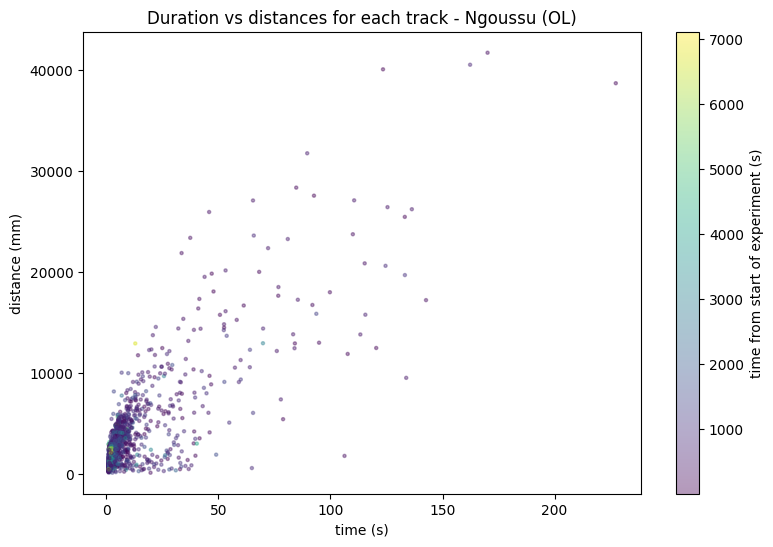

In [11]:
plt.figure(figsize=(9,6))
plt.scatter(durations, length, c=start_time, alpha=0.4, s=5)
plt.xlabel('time (s)')
plt.ylabel('distance (mm)')
plt.colorbar(label='time from start of experiment (s)')
plt.title(f'Duration vs distances for each track - {mos_title}')
plt.show()

In [ ]:
pos_vels_ut = [track[:, 3].tolist() for target, track in zip(targets_ut, tracks_ut) if target == 0]
pos_vels_ol = [track[:, 3].tolist() for target, track in zip(targets_ol, tracks_ol) if target == 1]

# Flatten the lists if needed:
pos_vels_ut = [item for sublist in pos_vels_ut for item in sublist]
pos_vels_ol = [item for sublist in pos_vels_ol for item in sublist]

In [ ]:
pos_vels_ut = np.array(pos_vels_ut)
pos_vels_ut = pos_vels_ut[~np.isnan(pos_vels_ut)]

pos_vels_ol = np.array(pos_vels_ol)
pos_vels_ol = pos_vels_ol[~np.isnan(pos_vels_ol)]

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.violinplot([pos_vels_ut, pos_vels_ol])
plt.legend()
plt.title('Histogram of positional velocities - Banfora')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(pos_vels_ut, label='UT', bins=100, alpha=0.6, density=True)
plt.hist(pos_vels_ol, label='OL', bins=80, alpha=0.6, density=True)
plt.legend()
plt.title('Histogram of positional velocities - Banfora')
plt.show()

In [ ]:
print(len(pos_vels_ut), len(pos_vels_ol))

In [ ]:
from scipy.stats import mannwhitneyu

stat, pval = mannwhitneyu(pos_vels_ut, pos_vels_ol, nan_policy='omit')
print(stat, pval)

In [ ]:
import pandas as pd
path ='E:/ITNS/olyset-vs-untreated/tests/first-run/data/df_target_raw.pkl'
df_target = pd.read_pickle(path)

In [ ]:
df_target['TrackGroup'].unique().shape

In [ ]:
import numpy as np
path ='E:/ITNS/olyset-vs-untreated/tests/first-run/data/raw_trackTargets.npy'
targets = np.load(path, allow_pickle=True)

In [ ]:
targets.shape